In [52]:
# Lo primero que hacemos para poder trabajar con los datos es importar las librerias necesarias:

# Para tratamiento de datos:
# ----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuramos pandas para que me muestre todas las columnas del dataframe

pd.set_option('display.max_columns', None)

# statistic tests
import scipy.stats as stats
from scipy.stats import shapiro, kstest, ttest_ind, mannwhitneyu, expon, chisquare, levene, chi2_contingency


In [53]:
# Cargamos el DataFrame limpio

df = pd.read_csv("Data/HR RAW DATA_CLEAN.csv", index_col=0)

df.head()


,EmployeeNumber,Age,Gender,Education,EducationField,NumCompaniesWorked,JobLevel,JobRole,Department,JobInvolvement,PerformanceRating,Attrition,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,MonthlyIncome,StockOptionLevel,PercentSalaryHike,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear,BusinessTravel,DistanceFromHome,OverTime,RemoteWork
0,162.0,51,Male,3,NaN,7,5,Research Director,Unknown,3,3.0,No,3,1.0,3,3.0,19537.0,0,13,20,15,15,5,Non-Travel,6,No,Yes
1,259.0,52,Male,4,Life Sciences,0,5,Manager,Unknown,2,3.0,No,3,3.0,1,3.0,19999.0,1,14,33,11,9,5,Non-Travel,1,No,Yes
2,319.0,42,Male,2,Technical Degree,1,5,Manager,Research & Development,3,3.0,No,4,3.0,4,3.0,19232.0,0,11,22,11,15,3,travel_rarely,4,No,Yes
3,Unknown,47,Female,4,Medical,3,4,Research Director,Unknown,3,3.0,No,3,1.0,2,3.0,17169.0,2,19,20,5,6,2,travel_rarely,2,No,No
4,Unknown,46,Female,3,Technical Degree,2,4,Sales Executive,Unknown,4,3.0,No,1,1.0,4,3.0,12528.4,1,12,19,2,8,5,Non-Travel,3,No,No


In [54]:
# Vamos a generar una nueva columna en el df con la media por empleado de las tres variables de satisfacción

df.loc[:,"mean_satisfaction"]=(df["RelationshipSatisfaction"]+df["JobSatisfaction"]+df["EnvironmentSatisfaction"])/3

df.sample(1)

,EmployeeNumber,Age,Gender,Education,EducationField,NumCompaniesWorked,JobLevel,JobRole,Department,JobInvolvement,PerformanceRating,Attrition,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,MonthlyIncome,StockOptionLevel,PercentSalaryHike,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear,BusinessTravel,DistanceFromHome,OverTime,RemoteWork,mean_satisfaction
1324,811.0,23,Male,3,Life Sciences,1,1,Laboratory Technician,Unknown,4,4.0,Yes,1,3.0,3,3.0,4777.0,2,21,0,0,0,2,Non-Travel,6,Yes,No,2.333333


# Mapas de calor para nivel medio de satisfacción

Dado que hay diferencias entre los niveles de satisfaccióon de los empleado que influyen de manera significativa en otras variables, vamos a ver cómo afecta a las relaciones, si las evaluamos para los dos grupos de empleados por separado


In [55]:
# crear una lista con las variables categóricas

cat_var_list = df.select_dtypes(include=['object']).columns
cat_var_list

Index(['EmployeeNumber', 'Gender', 'EducationField', 'JobRole', 'Department',
       'Attrition', 'BusinessTravel', 'OverTime', 'RemoteWork'],
      dtype='object')

In [56]:
# crear una lista con las variables numéricas

num_var_list = df.select_dtypes(exclude=['object']).columns
num_var_list

Index(['Age', 'Education', 'NumCompaniesWorked', 'JobLevel', 'JobInvolvement',
       'PerformanceRating', 'JobSatisfaction', 'EnvironmentSatisfaction',
       'RelationshipSatisfaction', 'WorkLifeBalance', 'MonthlyIncome',
       'StockOptionLevel', 'PercentSalaryHike', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'TrainingTimesLastYear', 'DistanceFromHome', 'mean_satisfaction'],
      dtype='object')

### Hacer un heatmap de las relaciones entre variables numéricas

In [57]:
# Para hacer un heatmap necesitamos realizar una matriz de correlación y para eso debemos comprobar 
# si las relaciones entre variables son lineales o no, y separarlas en función de esto

from itertools import combinations

combinaciones=list(combinations(num_var_list,2)) # Obtenemos una lista de tuplas con todas las combinaciones de 2 variables numéricas

# Comprobar linealidad
lineal_rel=[]
no_lineal_rel =[]

for tuple in combinaciones:
    _,p_value1 = kstest(df[tuple[0]],"norm") # for each combination we use the Kolmogorov-Smirnov test to check linearity of 
    _,p_value2 = kstest(df[tuple[1]],"norm") # the relation among these two variables

    # Aquí H0 asume que la relación es lineal, así que si ambos son > 0.05 se puede aceptar H0 y la relacion es aproximadamente lineal, 
    # en caso contrario no se puede asumir linealidad
    if p_value1 > 0.05 and p_value2 > 0.05:  
        lineal_rel.append(tuple)
                   
    else:
        no_lineal_rel.append(tuple)
                    

print(f'La combinación de variables que siguen relaciones lineales es: {lineal_rel}')
print(f'La combinación de variables que NO siguen relaciones lineales es: {no_lineal_rel}')


La combinación de variables que siguen relaciones lineales es: []
La combinación de variables que NO siguen relaciones lineales es: [('Age', 'Education'), ('Age', 'NumCompaniesWorked'), ('Age', 'JobLevel'), ('Age', 'JobInvolvement'), ('Age', 'PerformanceRating'), ('Age', 'JobSatisfaction'), ('Age', 'EnvironmentSatisfaction'), ('Age', 'RelationshipSatisfaction'), ('Age', 'WorkLifeBalance'), ('Age', 'MonthlyIncome'), ('Age', 'StockOptionLevel'), ('Age', 'PercentSalaryHike'), ('Age', 'YearsAtCompany'), ('Age', 'YearsSinceLastPromotion'), ('Age', 'YearsWithCurrManager'), ('Age', 'TrainingTimesLastYear'), ('Age', 'DistanceFromHome'), ('Age', 'mean_satisfaction'), ('Education', 'NumCompaniesWorked'), ('Education', 'JobLevel'), ('Education', 'JobInvolvement'), ('Education', 'PerformanceRating'), ('Education', 'JobSatisfaction'), ('Education', 'EnvironmentSatisfaction'), ('Education', 'RelationshipSatisfaction'), ('Education', 'WorkLifeBalance'), ('Education', 'MonthlyIncome'), ('Education', '

Todas las relaciones son no lineales

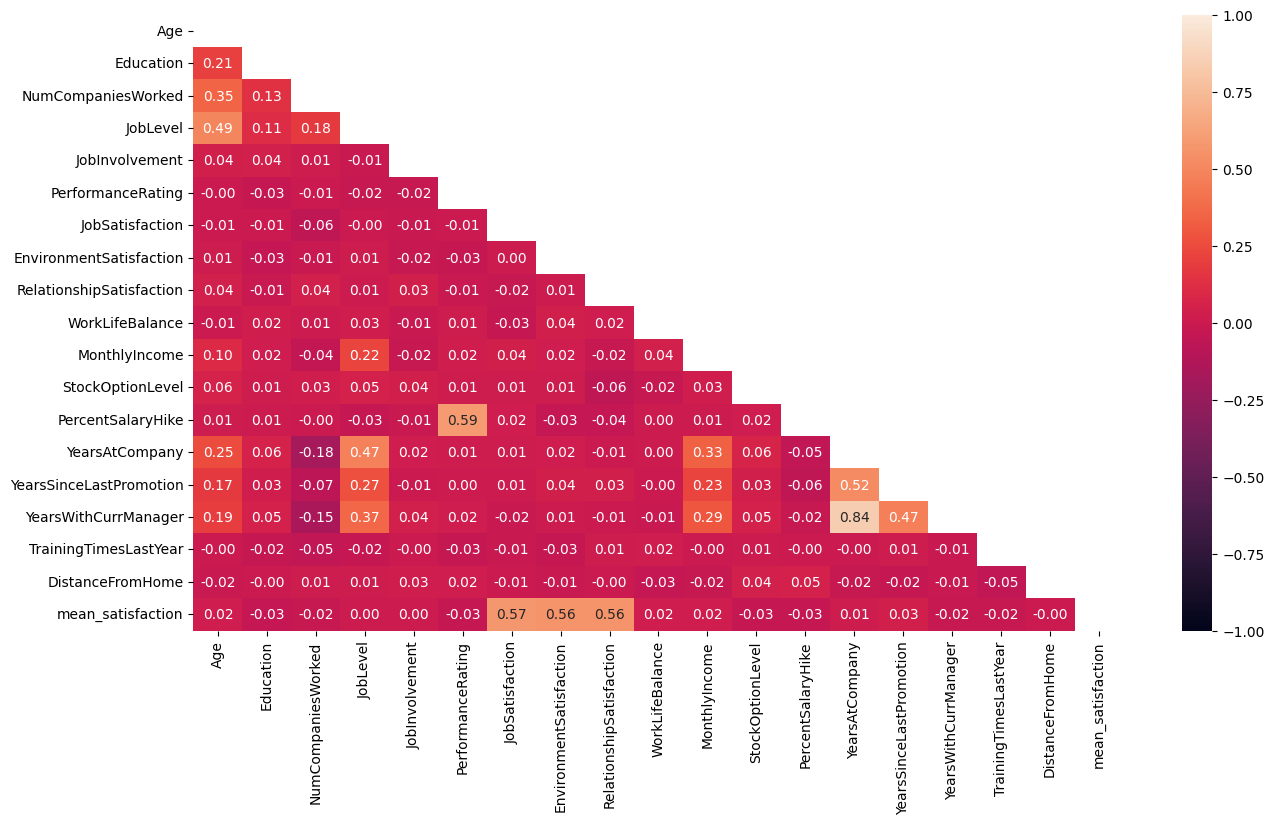

In [58]:
# preparamos la matriz de correlación y hacemos el heatmap con una máscara para no ver las correlaciones repetidas

matriz_corr = df.select_dtypes(exclude=object).corr("spearman")

mascara= np.triu(np.ones_like(matriz_corr, dtype= bool))

plt.figure(figsize=(15,8))

sns.heatmap(data=matriz_corr, annot=True, fmt=".2f", vmax=1, vmin=-1, mask=mascara);

JobLevel está correlacionado con
- YearsAtCompany
- YearsSinceLastPromotion
- YearsWithCurrManager

MonthlyIncome está correlacionada con esas mismas variables.

También vemos una correlación entre "PercentSalaryHike" y "PerformanceRating", es decir, los empleados que tienen buena calificación tienen  mejores aumentos.

Vemos que MeanSatisfaction está correlacionada con las otras variables de Satisfacción, pero no vemos ninguna otra relación importante, es decir, no identificamos ninguna variable que pueda influir significativamente en la MeanSatisfaction, que según nos indica el A/B testing es la variable principal que influye en que los empleados se vayan o no de la empresa.

Dado que hay diferencias entre los niveles de satisfaccióon de los empleado que influyen de manera significativa en otras variables, vamos a ver cómo afecta a las relaciones, si las evaluamos para los dos grupos de empleados por separado.

In [59]:
# 1. Grupo A, mean satisfaction >= 2.5

df_MS_A = df[df["mean_satisfaction"]>=2.5]

#comprobar
df_MS_A.head(2)

,EmployeeNumber,Age,Gender,Education,EducationField,NumCompaniesWorked,JobLevel,JobRole,Department,JobInvolvement,PerformanceRating,Attrition,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,MonthlyIncome,StockOptionLevel,PercentSalaryHike,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear,BusinessTravel,DistanceFromHome,OverTime,RemoteWork,mean_satisfaction
2,319.0,42,Male,2,Technical Degree,1,5,Manager,Research & Development,3,3.0,No,4,3.0,4,3.0,19232.0,0,11,22,11,15,3,travel_rarely,4,No,Yes,3.666667
5,1900.0,48,Female,3,Medical,3,4,Manager,Research & Development,3,3.0,No,4,4.0,2,3.0,17174.0,1,11,22,4,7,3,Non-Travel,22,No,Yes,3.333333


In [60]:
# crear una lista con las variables numéricas

num_var_list_A = df_MS_A.select_dtypes(exclude=['object']).columns
num_var_list_A

Index(['Age', 'Education', 'NumCompaniesWorked', 'JobLevel', 'JobInvolvement',
       'PerformanceRating', 'JobSatisfaction', 'EnvironmentSatisfaction',
       'RelationshipSatisfaction', 'WorkLifeBalance', 'MonthlyIncome',
       'StockOptionLevel', 'PercentSalaryHike', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'TrainingTimesLastYear', 'DistanceFromHome', 'mean_satisfaction'],
      dtype='object')

In [61]:
# 2. Grupo B, mean satisfaction < 2.5

df_MS_B = df[df["mean_satisfaction"]<2.5]

#comprobar
df_MS_B.head(2)

,EmployeeNumber,Age,Gender,Education,EducationField,NumCompaniesWorked,JobLevel,JobRole,Department,JobInvolvement,PerformanceRating,Attrition,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,MonthlyIncome,StockOptionLevel,PercentSalaryHike,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear,BusinessTravel,DistanceFromHome,OverTime,RemoteWork,mean_satisfaction
0,162.0,51,Male,3,NaN,7,5,Research Director,Unknown,3,3.0,No,3,1.0,3,3.0,19537.0,0,13,20,15,15,5,Non-Travel,6,No,Yes,2.333333
1,259.0,52,Male,4,Life Sciences,0,5,Manager,Unknown,2,3.0,No,3,3.0,1,3.0,19999.0,1,14,33,11,9,5,Non-Travel,1,No,Yes,2.333333


In [62]:
# crear una lista con las variables numéricas

num_var_list_B = df_MS_B.select_dtypes(exclude=['object']).columns
num_var_list_B


Index(['Age', 'Education', 'NumCompaniesWorked', 'JobLevel', 'JobInvolvement',
       'PerformanceRating', 'JobSatisfaction', 'EnvironmentSatisfaction',
       'RelationshipSatisfaction', 'WorkLifeBalance', 'MonthlyIncome',
       'StockOptionLevel', 'PercentSalaryHike', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'TrainingTimesLastYear', 'DistanceFromHome', 'mean_satisfaction'],
      dtype='object')

In [63]:
# Para el grupo A
# Para hacer un heatmap necesitamos realizar una matriz de correlación y para eso debemos comprobar 
# si las relaciones entre variables son lineales o no, y separarlas en función de esto

# crear una lista con las variables numéricas

num_var_list = df.select_dtypes(exclude=['object']).columns

from itertools import combinations

combinaciones=list(combinations(num_var_list,2)) # Obtenemos una lista de tuplas con todas las combinaciones de 2 variables numéricas

combinaciones_A=list(combinations(num_var_list_A,2)) # Obtenemos una lista de tuplas con todas las combinaciones de 2 variables numéricas

# Comprobar linealidad
lineal_rel_A=[]
no_lineal_rel_A =[]

for tuple in combinaciones:
    _,p_value1_A = kstest(df[tuple[0]],"norm") # for each combination we use the Kolmogorov-Smirnov test to check linearity of 
    _,p_value2_A = kstest(df[tuple[1]],"norm") # the relation among these two variables

    # Aquí H0 asume que la relación es lineal, así que si ambos son > 0.05 se puede aceptar H0 y la relacion es aproximadamente lineal, 
    # en caso contrario no se puede asumir linealidad
    if p_value1_A > 0.05 and p_value2_A > 0.05:  
        lineal_rel_A.append(tuple)
                   
    else:
        no_lineal_rel_A.append(tuple)
                    

print(f'La combinación de variables que siguen relaciones lineales es: {lineal_rel_A}')
print(f'La combinación de variables que NO siguen relaciones lineales es: {no_lineal_rel_A}')

La combinación de variables que siguen relaciones lineales es: []
La combinación de variables que NO siguen relaciones lineales es: [('Age', 'Education'), ('Age', 'NumCompaniesWorked'), ('Age', 'JobLevel'), ('Age', 'JobInvolvement'), ('Age', 'PerformanceRating'), ('Age', 'JobSatisfaction'), ('Age', 'EnvironmentSatisfaction'), ('Age', 'RelationshipSatisfaction'), ('Age', 'WorkLifeBalance'), ('Age', 'MonthlyIncome'), ('Age', 'StockOptionLevel'), ('Age', 'PercentSalaryHike'), ('Age', 'YearsAtCompany'), ('Age', 'YearsSinceLastPromotion'), ('Age', 'YearsWithCurrManager'), ('Age', 'TrainingTimesLastYear'), ('Age', 'DistanceFromHome'), ('Age', 'mean_satisfaction'), ('Education', 'NumCompaniesWorked'), ('Education', 'JobLevel'), ('Education', 'JobInvolvement'), ('Education', 'PerformanceRating'), ('Education', 'JobSatisfaction'), ('Education', 'EnvironmentSatisfaction'), ('Education', 'RelationshipSatisfaction'), ('Education', 'WorkLifeBalance'), ('Education', 'MonthlyIncome'), ('Education', '

In [64]:
# Para el grupo B

combinaciones_B=list(combinations(num_var_list_B,2)) # Obtenemos una lista de tuplas con todas las combinaciones de 2 variables numéricas

# Comprobar linealidad
lineal_rel_B=[]
no_lineal_rel_B =[]

for tuple in combinaciones:
    _,p_value1_B = kstest(df[tuple[0]],"norm") # for each combination we use the Kolmogorov-Smirnov test to check linearity of 
    _,p_value2_B = kstest(df[tuple[1]],"norm") # the relation among these two variables

    # Aquí H0 asume que la relación es lineal, así que si ambos son > 0.05 se puede aceptar H0 y la relacion es aproximadamente lineal, 
    # en caso contrario no se puede asumir linealidad
    if p_value1_B > 0.05 and p_value2_B > 0.05:  
        lineal_rel_B.append(tuple)
                   
    else:
        no_lineal_rel_B.append(tuple)
                    

print(f'La combinación de variables que siguen relaciones lineales es: {lineal_rel_B}')
print(f'La combinación de variables que NO siguen relaciones lineales es: {no_lineal_rel_B}')

La combinación de variables que siguen relaciones lineales es: []
La combinación de variables que NO siguen relaciones lineales es: [('Age', 'Education'), ('Age', 'NumCompaniesWorked'), ('Age', 'JobLevel'), ('Age', 'JobInvolvement'), ('Age', 'PerformanceRating'), ('Age', 'JobSatisfaction'), ('Age', 'EnvironmentSatisfaction'), ('Age', 'RelationshipSatisfaction'), ('Age', 'WorkLifeBalance'), ('Age', 'MonthlyIncome'), ('Age', 'StockOptionLevel'), ('Age', 'PercentSalaryHike'), ('Age', 'YearsAtCompany'), ('Age', 'YearsSinceLastPromotion'), ('Age', 'YearsWithCurrManager'), ('Age', 'TrainingTimesLastYear'), ('Age', 'DistanceFromHome'), ('Age', 'mean_satisfaction'), ('Education', 'NumCompaniesWorked'), ('Education', 'JobLevel'), ('Education', 'JobInvolvement'), ('Education', 'PerformanceRating'), ('Education', 'JobSatisfaction'), ('Education', 'EnvironmentSatisfaction'), ('Education', 'RelationshipSatisfaction'), ('Education', 'WorkLifeBalance'), ('Education', 'MonthlyIncome'), ('Education', '

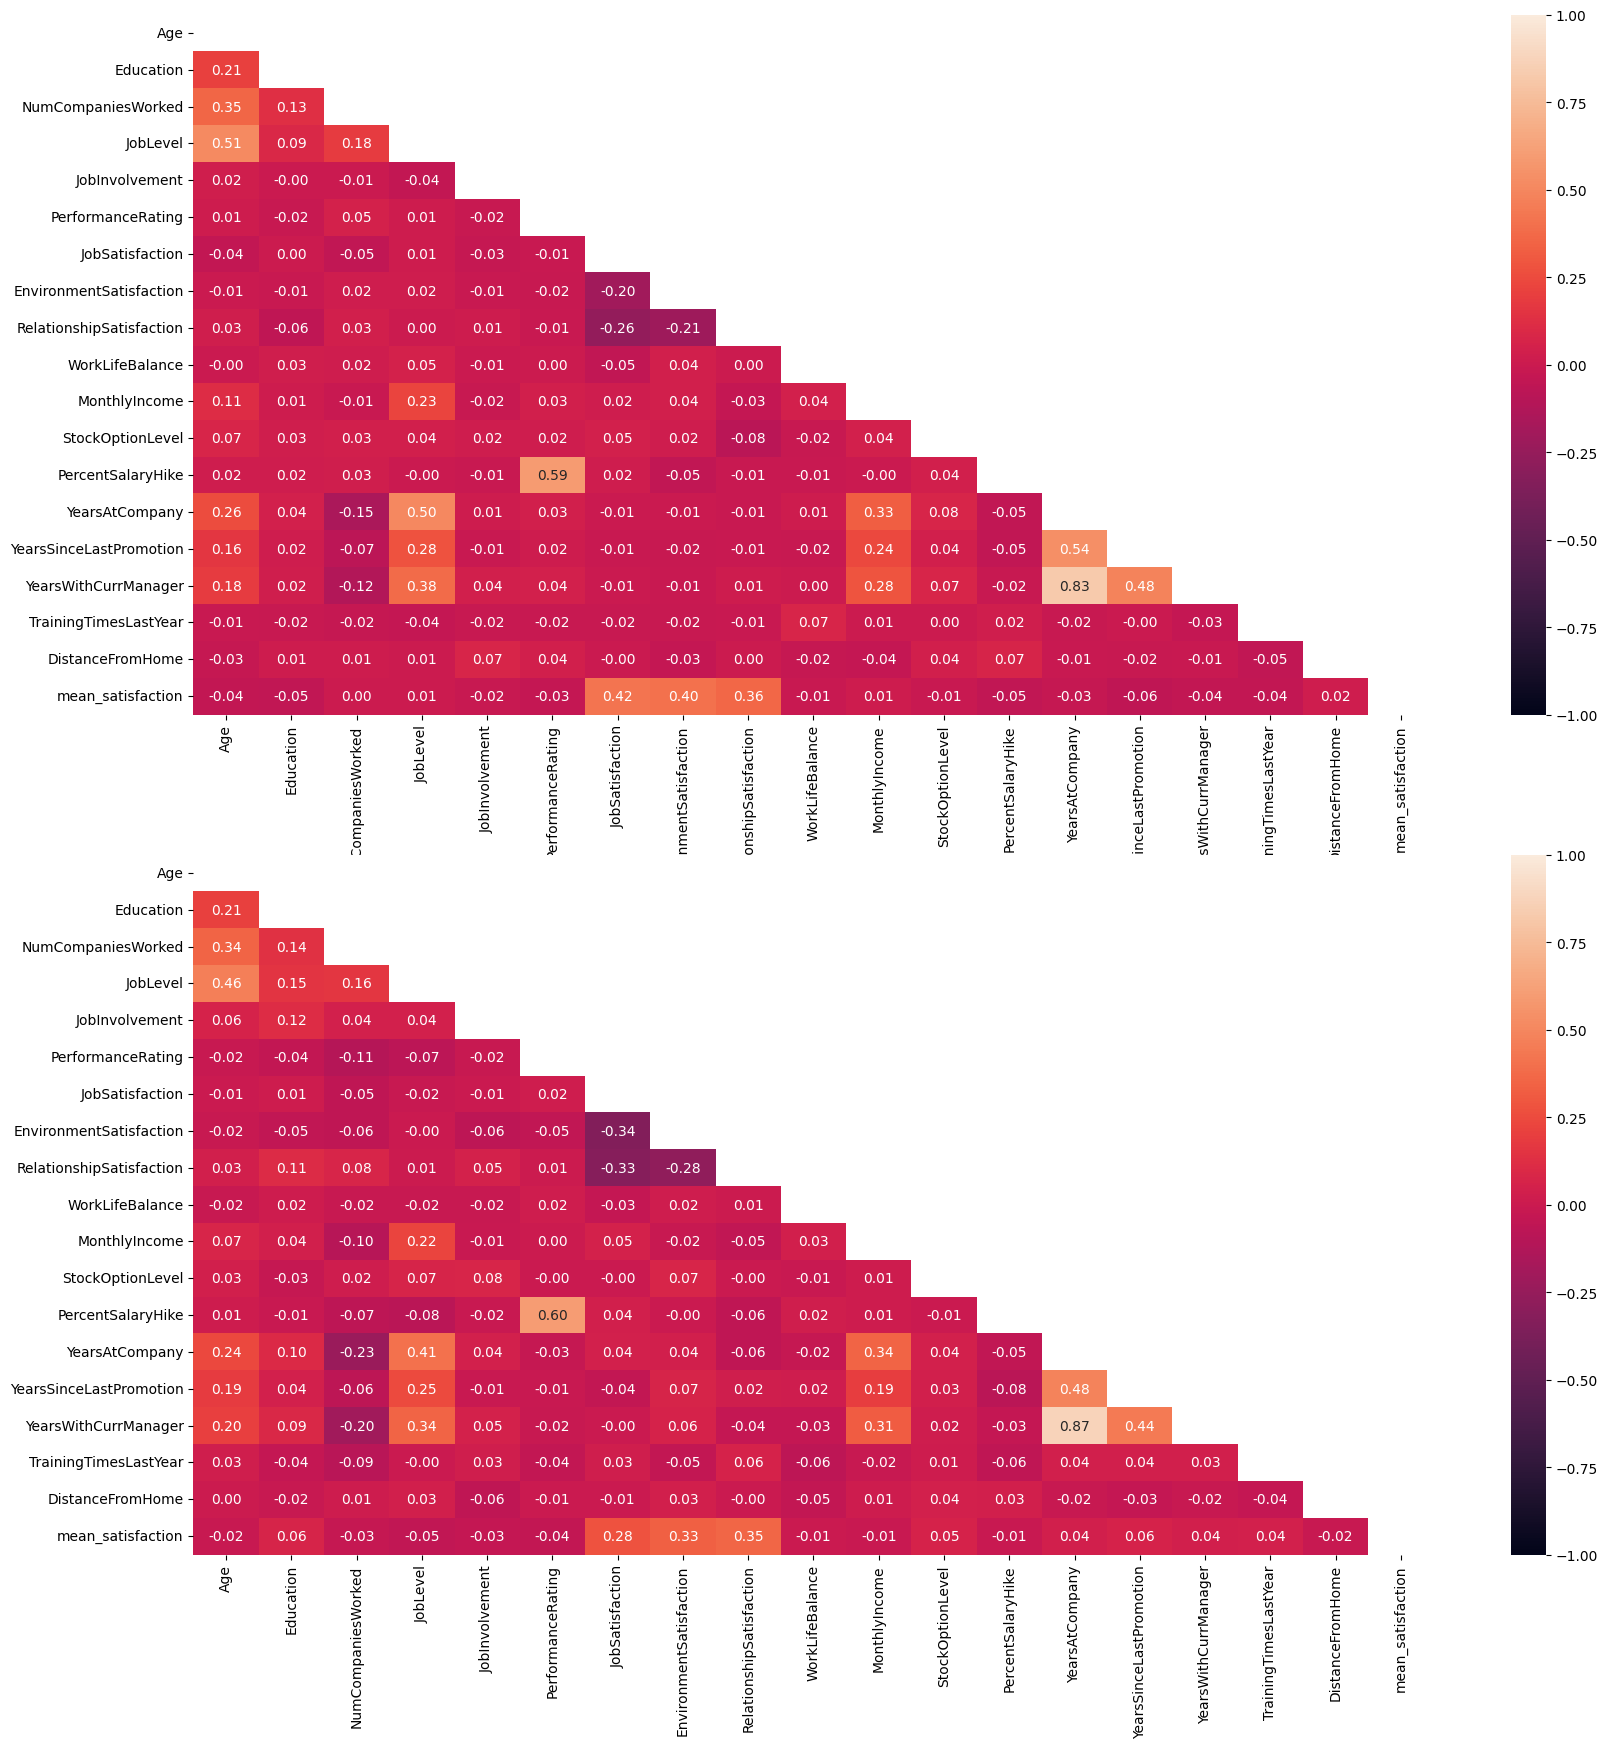

In [65]:
# preparamos las matrices de correlación y hacemos el heatmap con una máscara para no ver las correlaciones repetidas

figs, axes= plt.subplots(nrows=2, ncols=1, figsize=(20,20))
matriz_corr_A = df_MS_A.select_dtypes(exclude=object).corr("spearman")
matriz_corr_B = df_MS_B.select_dtypes(exclude=object).corr("spearman")

mascara= np.triu(np.ones_like(matriz_corr_A, dtype= bool))

sns.heatmap(data=matriz_corr_A, annot=True, fmt=".2f", vmax=1, vmin=-1, mask=mascara, ax=axes[0])
sns.heatmap(data=matriz_corr_B, annot=True, fmt=".2f", vmax=1, vmin=-1, mask=mascara, ax=axes[1]);


In [66]:
# Vamos ahora dentro de cada grupo a separar por attrition
# df de la gente de df_MS_A con attrition = "yes"

df_MS_A_Y=df_MS_A[df_MS_A["Attrition"]=="Yes"]

num_var_list_A_Y = df_MS_A_Y.select_dtypes(exclude=['object']).columns

combinaciones_A_Y=list(combinations(num_var_list_A_Y,2)) # Obtenemos una lista de tuplas con todas las combinaciones de 2 variables numéricas

# Comprobar linealidad
lineal_rel_A_Y=[]
no_lineal_rel_A_Y =[]

for tuple in combinaciones:
    _,p_value1_A_Y = kstest(df[tuple[0]],"norm") # for each combination we use the Kolmogorov-Smirnov test to check linearity of 
    _,p_value2_A_Y = kstest(df[tuple[1]],"norm") # the relation among these two variables

    # Aquí H0 asume que la relación es lineal, así que si ambos son > 0.05 se puede aceptar H0 y la relacion es aproximadamente lineal, 
    # en caso contrario no se puede asumir linealidad
    if p_value1_A_Y > 0.05 and p_value2_A_Y > 0.05:  
        lineal_rel_A_Y.append(tuple)
                   
    else:
        no_lineal_rel_A_Y.append(tuple)
                    

print(f'La combinación de variables que siguen relaciones lineales es: {lineal_rel_A_Y}')
print(f'La combinación de variables que NO siguen relaciones lineales es: {no_lineal_rel_A_Y}')

La combinación de variables que siguen relaciones lineales es: []
La combinación de variables que NO siguen relaciones lineales es: [('Age', 'Education'), ('Age', 'NumCompaniesWorked'), ('Age', 'JobLevel'), ('Age', 'JobInvolvement'), ('Age', 'PerformanceRating'), ('Age', 'JobSatisfaction'), ('Age', 'EnvironmentSatisfaction'), ('Age', 'RelationshipSatisfaction'), ('Age', 'WorkLifeBalance'), ('Age', 'MonthlyIncome'), ('Age', 'StockOptionLevel'), ('Age', 'PercentSalaryHike'), ('Age', 'YearsAtCompany'), ('Age', 'YearsSinceLastPromotion'), ('Age', 'YearsWithCurrManager'), ('Age', 'TrainingTimesLastYear'), ('Age', 'DistanceFromHome'), ('Age', 'mean_satisfaction'), ('Education', 'NumCompaniesWorked'), ('Education', 'JobLevel'), ('Education', 'JobInvolvement'), ('Education', 'PerformanceRating'), ('Education', 'JobSatisfaction'), ('Education', 'EnvironmentSatisfaction'), ('Education', 'RelationshipSatisfaction'), ('Education', 'WorkLifeBalance'), ('Education', 'MonthlyIncome'), ('Education', '

In [67]:
# Hacemos lo mismo para el grupo B
# df de la gente de df_MS_B con attrition = "yes"

df_MS_B_Y=df_MS_B[df_MS_B["Attrition"]=="Yes"]

num_var_list_B_Y = df_MS_B_Y.select_dtypes(exclude=['object']).columns
num_var_list_B_Y

Index(['Age', 'Education', 'NumCompaniesWorked', 'JobLevel', 'JobInvolvement',
       'PerformanceRating', 'JobSatisfaction', 'EnvironmentSatisfaction',
       'RelationshipSatisfaction', 'WorkLifeBalance', 'MonthlyIncome',
       'StockOptionLevel', 'PercentSalaryHike', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'TrainingTimesLastYear', 'DistanceFromHome', 'mean_satisfaction'],
      dtype='object')

In [68]:
combinaciones_B_Y=list(combinations(num_var_list_B_Y,2)) # Obtenemos una lista de tuplas con todas las combinaciones de 2 variables numéricas

# Comprobar linealidad
lineal_rel_B_Y=[]
no_lineal_rel_B_Y =[]

for tuple in combinaciones:
    _,p_value1_B_Y = kstest(df[tuple[0]],"norm") # for each combination we use the Kolmogorov-Smirnov test to check linearity of 
    _,p_value2_B_Y = kstest(df[tuple[1]],"norm") # the relation among these two variables

    # Aquí H0 asume que la relación es lineal, así que si ambos son > 0.05 se puede aceptar H0 y la relacion es aproximadamente lineal, 
    # en caso contrario no se puede asumir linealidad
    if p_value1_B_Y > 0.05 and p_value2_B_Y > 0.05:  
        lineal_rel_B_Y.append(tuple)
                   
    else:
        no_lineal_rel_B_Y.append(tuple)
                    

print(f'La combinación de variables que siguen relaciones lineales es: {lineal_rel_B_Y}')
print(f'La combinación de variables que NO siguen relaciones lineales es: {no_lineal_rel_B_Y}')

La combinación de variables que siguen relaciones lineales es: []
La combinación de variables que NO siguen relaciones lineales es: [('Age', 'Education'), ('Age', 'NumCompaniesWorked'), ('Age', 'JobLevel'), ('Age', 'JobInvolvement'), ('Age', 'PerformanceRating'), ('Age', 'JobSatisfaction'), ('Age', 'EnvironmentSatisfaction'), ('Age', 'RelationshipSatisfaction'), ('Age', 'WorkLifeBalance'), ('Age', 'MonthlyIncome'), ('Age', 'StockOptionLevel'), ('Age', 'PercentSalaryHike'), ('Age', 'YearsAtCompany'), ('Age', 'YearsSinceLastPromotion'), ('Age', 'YearsWithCurrManager'), ('Age', 'TrainingTimesLastYear'), ('Age', 'DistanceFromHome'), ('Age', 'mean_satisfaction'), ('Education', 'NumCompaniesWorked'), ('Education', 'JobLevel'), ('Education', 'JobInvolvement'), ('Education', 'PerformanceRating'), ('Education', 'JobSatisfaction'), ('Education', 'EnvironmentSatisfaction'), ('Education', 'RelationshipSatisfaction'), ('Education', 'WorkLifeBalance'), ('Education', 'MonthlyIncome'), ('Education', '

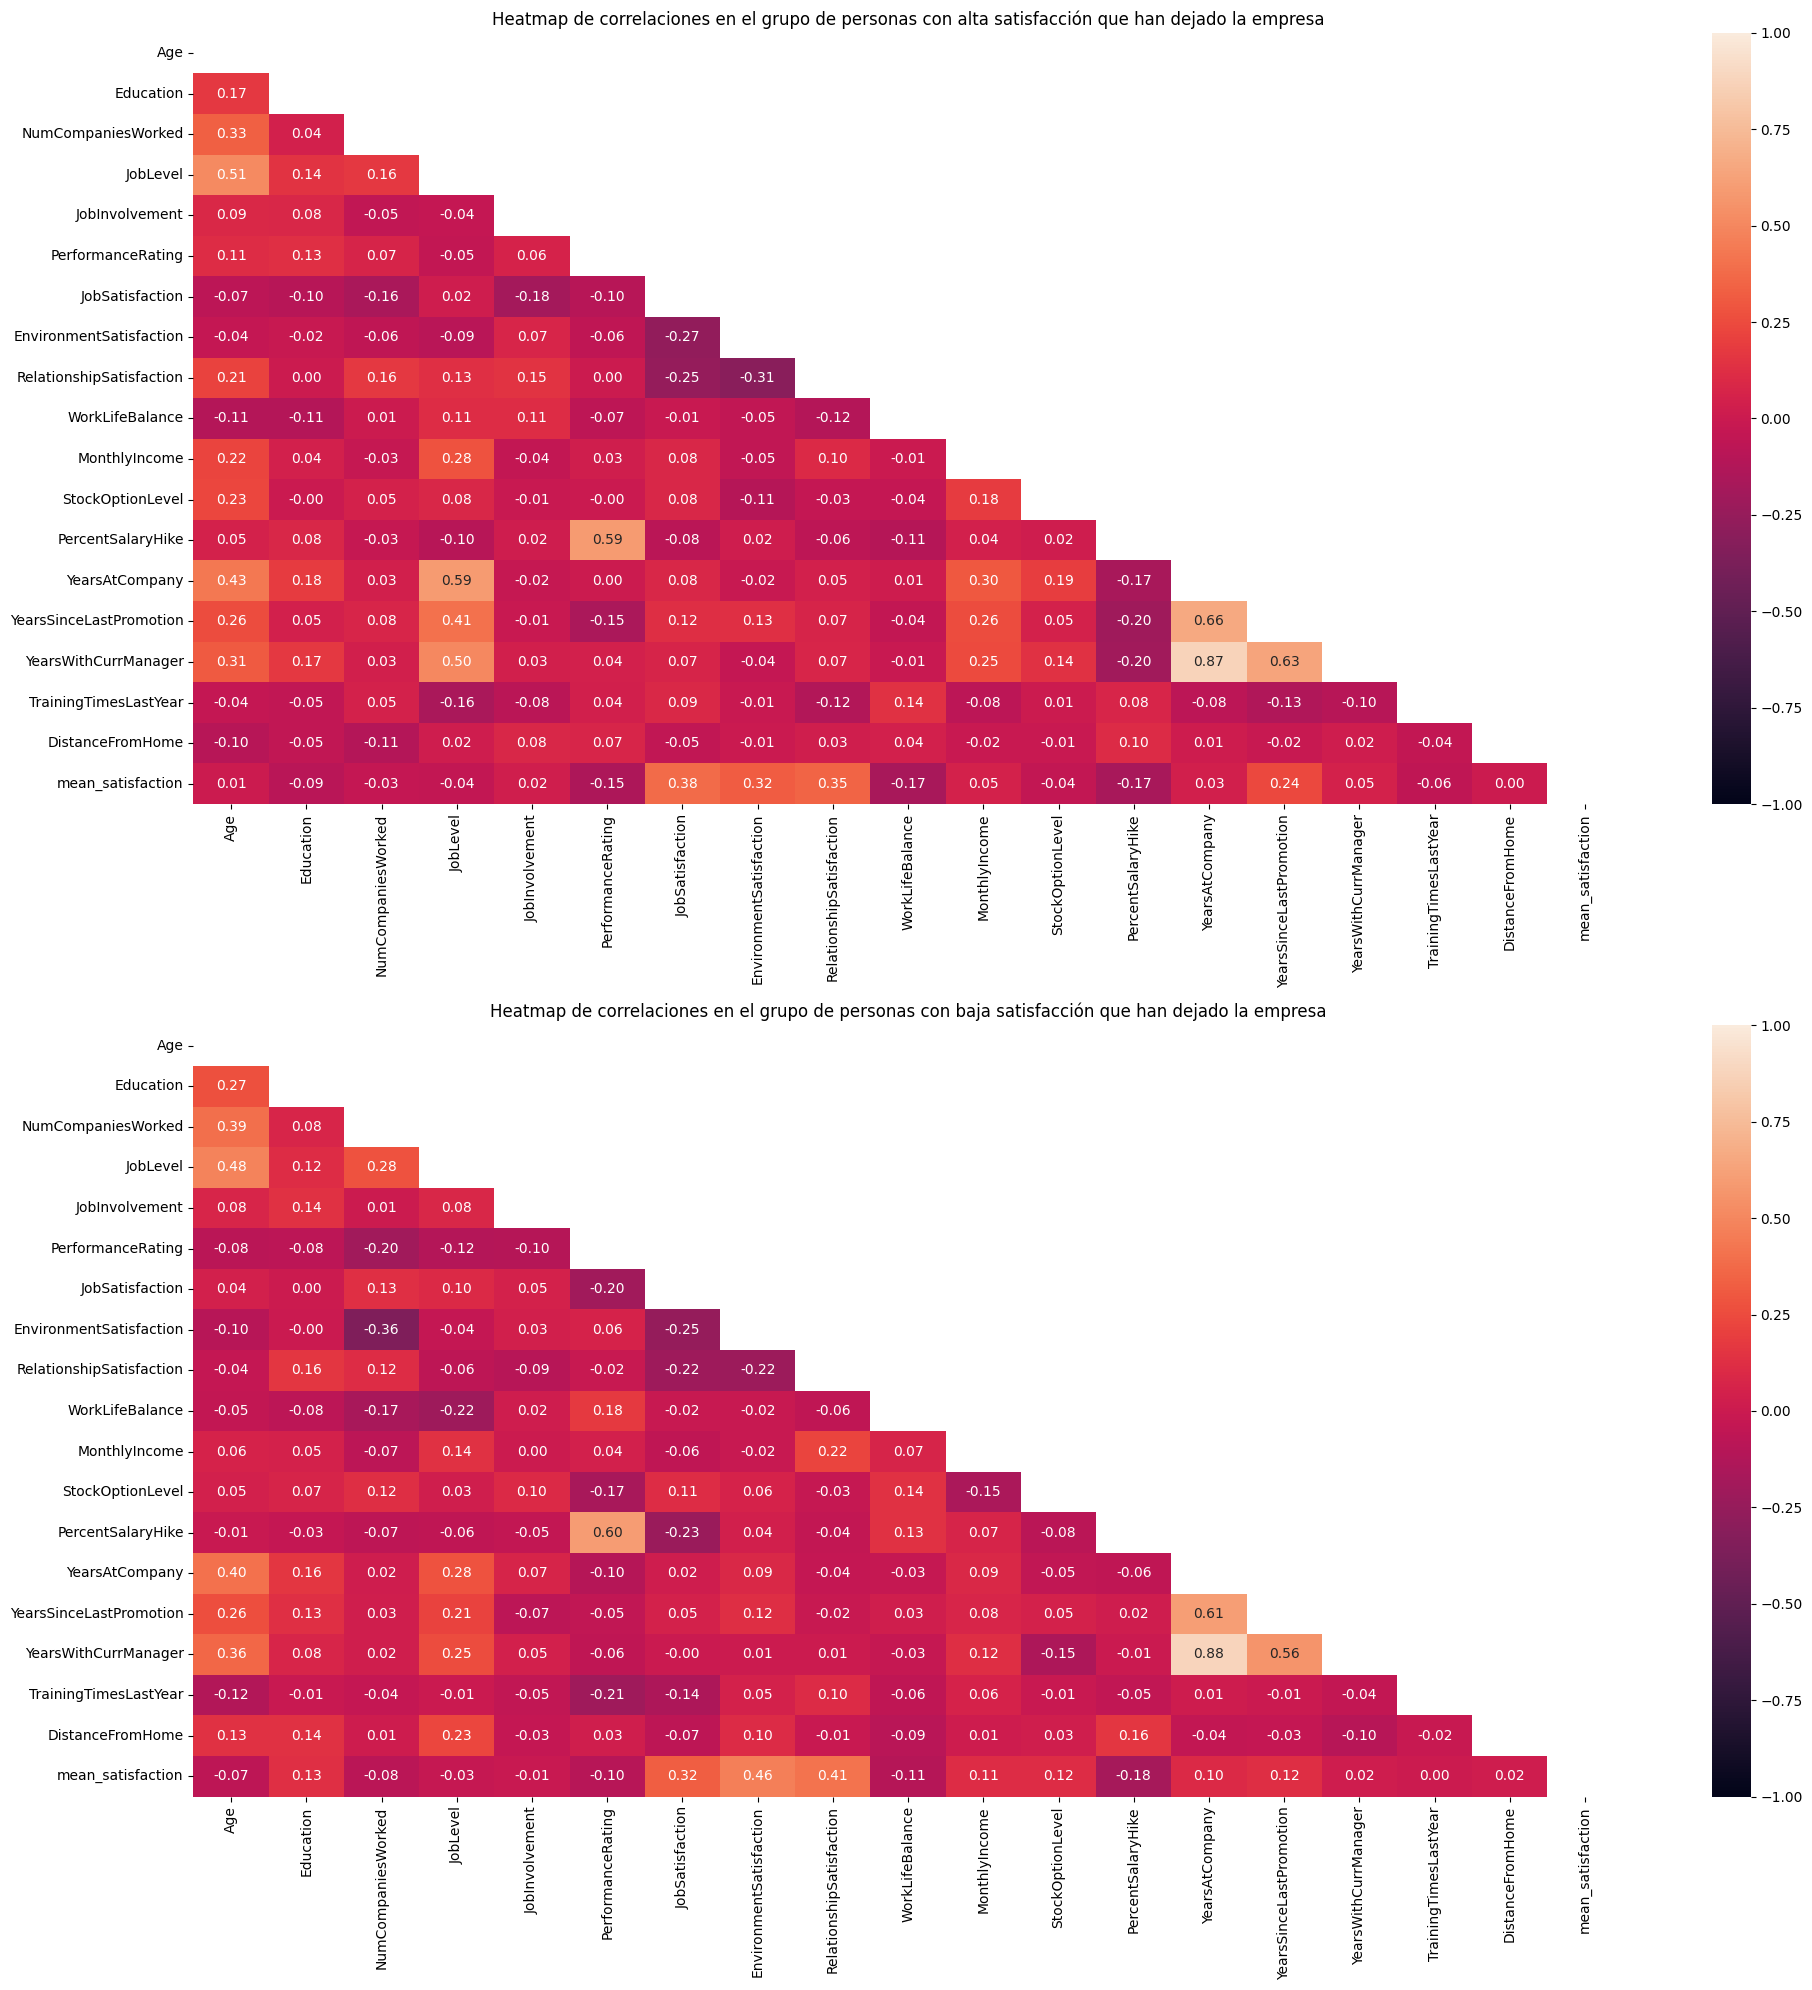

In [69]:
matriz_corr_A_Y = df_MS_A_Y.select_dtypes(exclude= object).corr("spearman")
matriz_corr_B_Y = df_MS_B_Y.select_dtypes(exclude= object).corr("spearman")

mascara= np.triu(np.ones_like(matriz_corr_A_Y, dtype= bool))

figs, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,20))

sns.heatmap(data=matriz_corr_A_Y, annot=True, fmt=".2f", vmax=1, vmin=-1, mask=mascara, ax=axes[0])
sns.heatmap(data=matriz_corr_B_Y, annot=True, fmt=".2f", vmax=1, vmin=-1, mask=mascara, ax=axes[1])

axes[0].set_title("Heatmap de correlaciones en el grupo de personas con alta satisfacción que han dejado la empresa")
axes[1].set_title("Heatmap de correlaciones en el grupo de personas con baja satisfacción que han dejado la empresa")

plt.tight_layout();

# Análisis por género

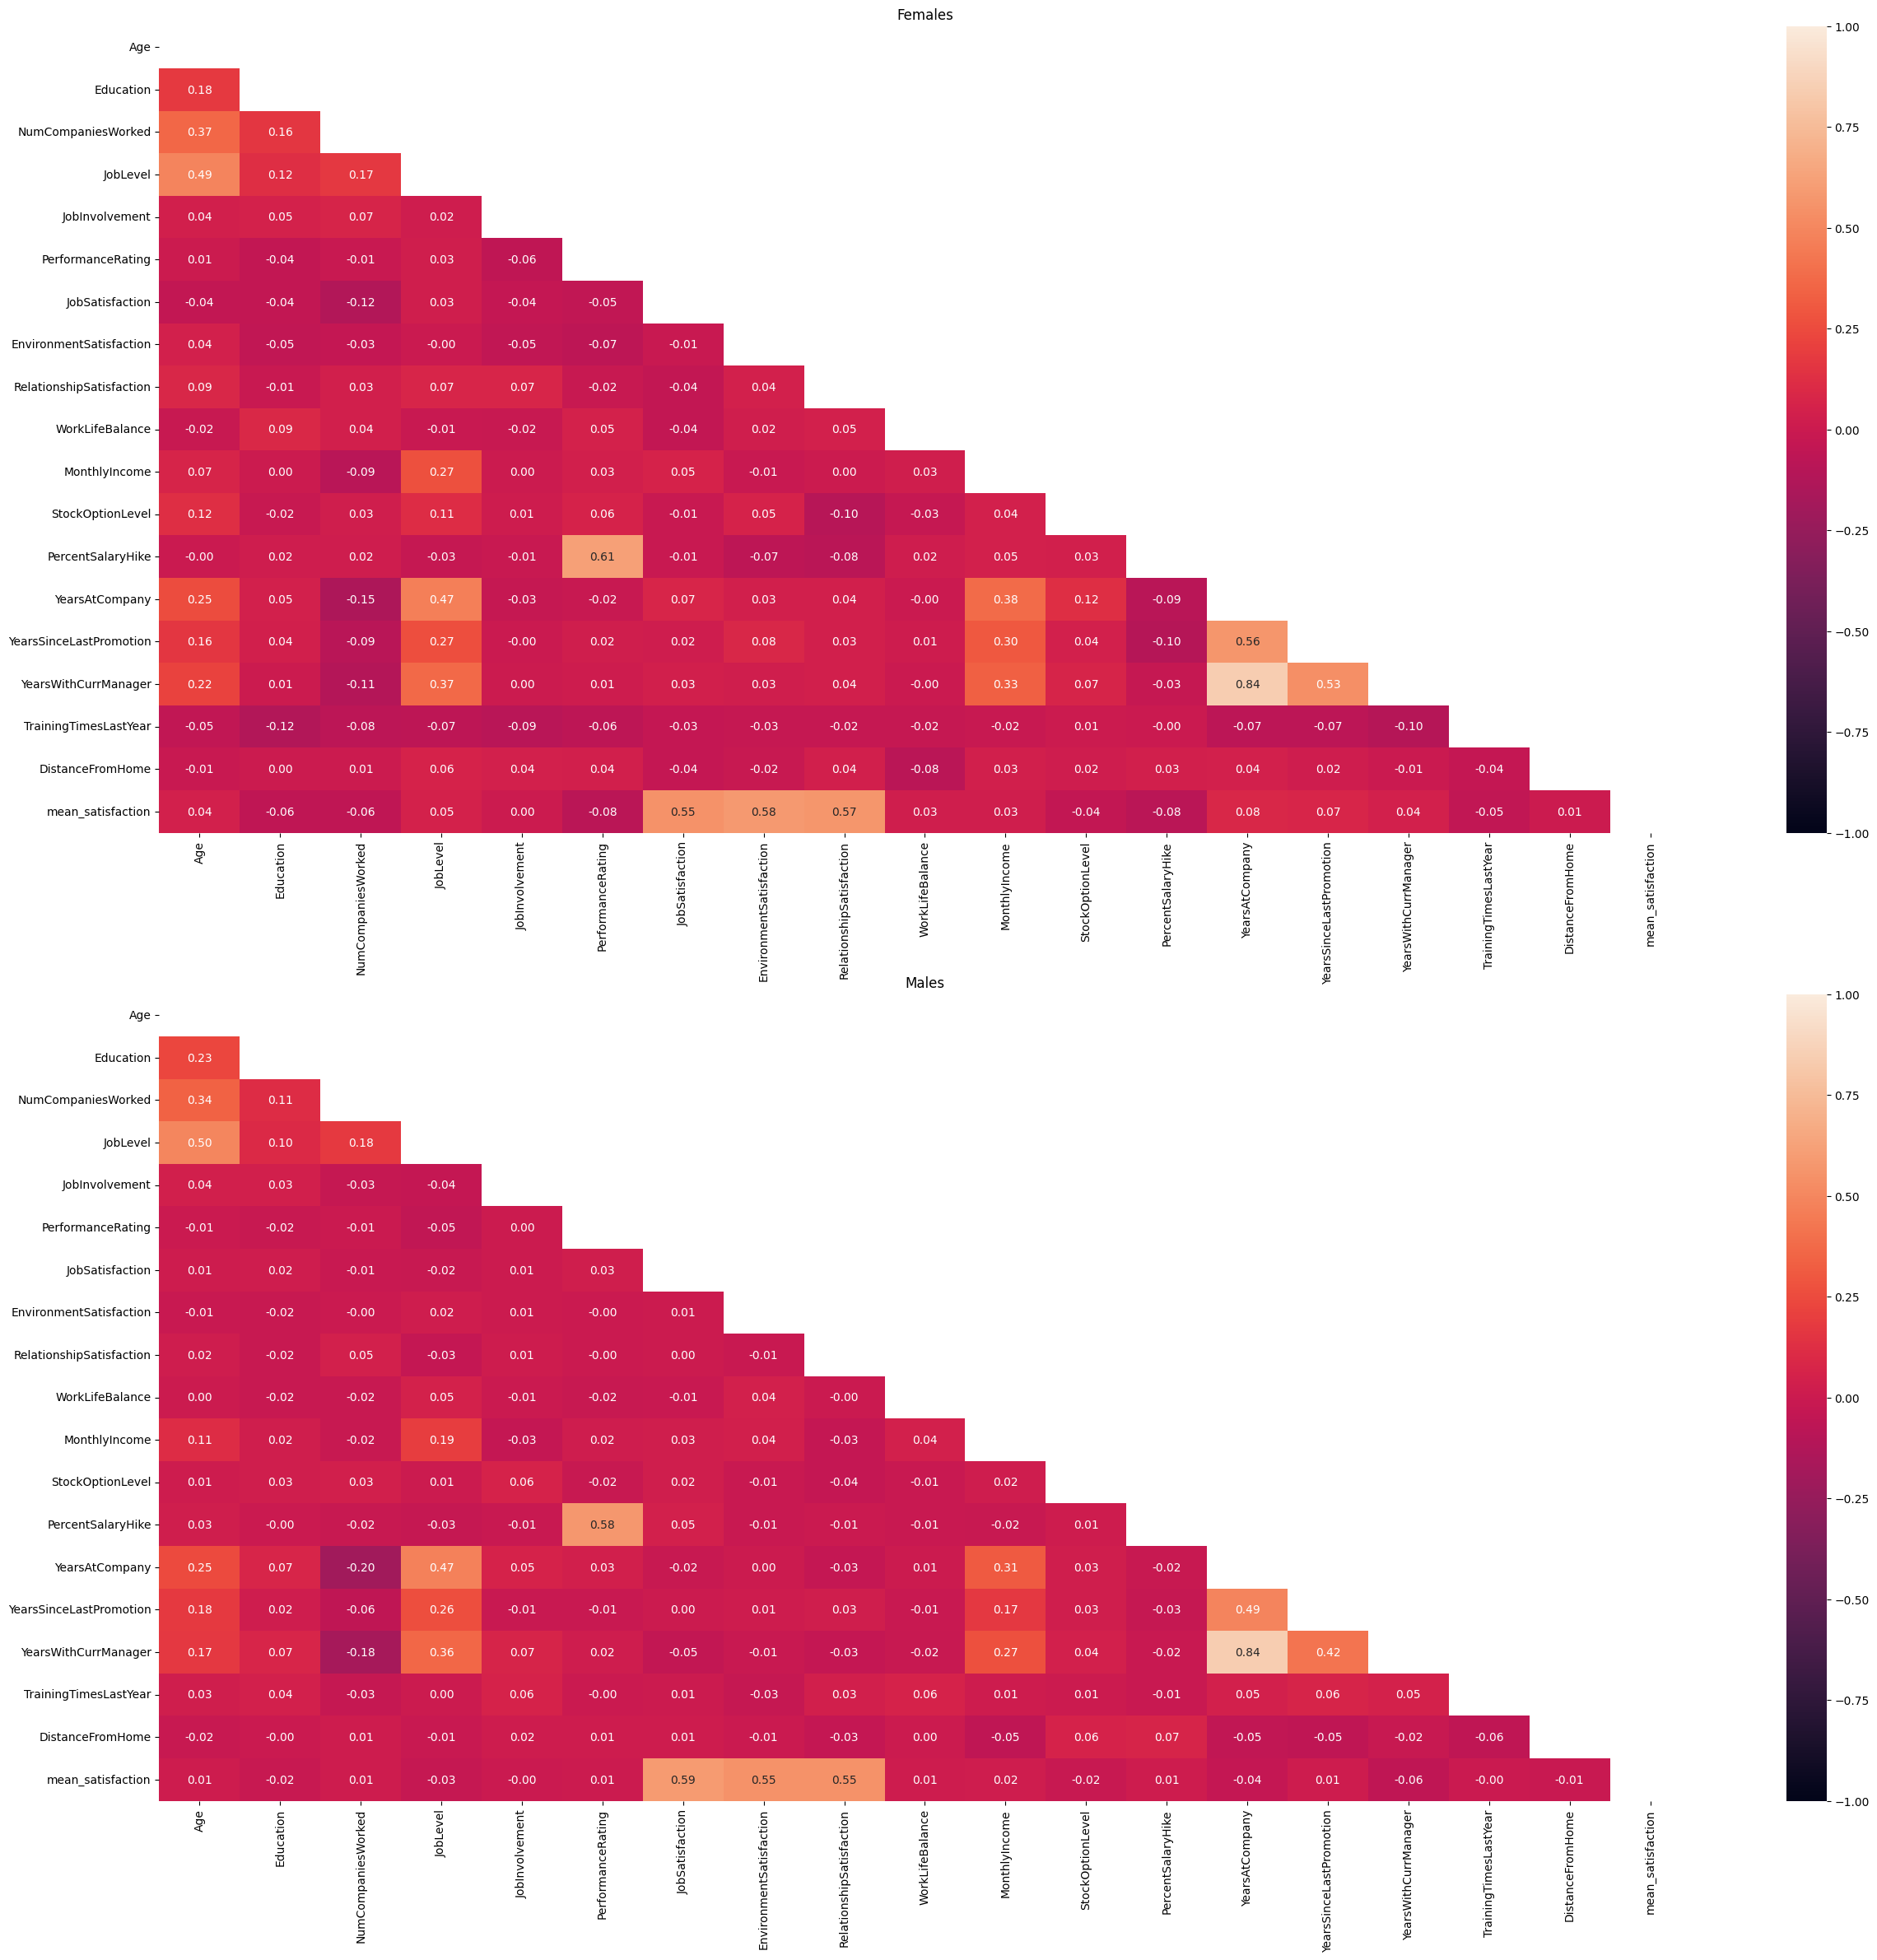

In [70]:
# Vamos a realizar dos mapas de calor por sexos, para identificar posibles correlaciones entre las variables

# Preparamos la matriz de correlación y hacemos el heatmap con una máscara para no ver las correlaciones repetidas

figs, axes = plt.subplots(nrows=2, ncols=1, figsize=(30,28))

df_female = df[df['Gender']== 'Female']
df_male = df [df['Gender'] == 'Male']

matriz_corr_fem = df_female.select_dtypes(exclude=object).corr("spearman")
matriz_corr_male = df_male.select_dtypes(exclude=object).corr("spearman")

mascara= np.triu(np.ones_like(matriz_corr, dtype= bool))

sns.heatmap(data=matriz_corr_fem, annot=True, fmt=".2f", vmax=1, vmin=-1, mask=mascara, ax=axes[0])
sns.heatmap(data=matriz_corr_male , annot=True, fmt=".2f", vmax=1, vmin=-1, mask=mascara, ax=axes[1])

axes[0].set_title("Females")
axes[1].set_title("Males");


No se aprecian relaciones significativas para el análisis.

Existe una correlación positiva, en todos los casos, entre el nivel de desempeño y el porcentaje de subida salarial. También hay una correlación positiva entre los años en la compañía y los años con el actual director y entre los años con el actual director y los años desde la última promoción.

Otras correlaciones positivas existen entre las variables nivel del puesto de trabajo y años en la compañía, lo que parece indicar que la gente va promocionando con el paso del tiempo en la empresa, y entre los ingresos mensuales y los años en la compañía, lo que refleja las subidas salariales con los años.

,Gender,Age
0,Female,596
1,Male,890


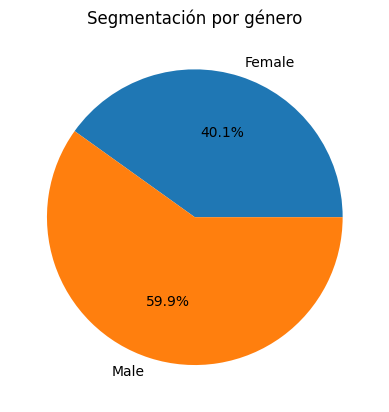

In [71]:
# Hacemos un diagrama de pastel para ver qué porcentaje de hombres y mujeres componen la empresa

df_gender= df.groupby('Gender')['Age'].count().reset_index()
display(df_gender)

plt.pie('Age', labels='Gender', data=df_gender, autopct= '%1.1f%%')

plt.title("Segmentación por género");


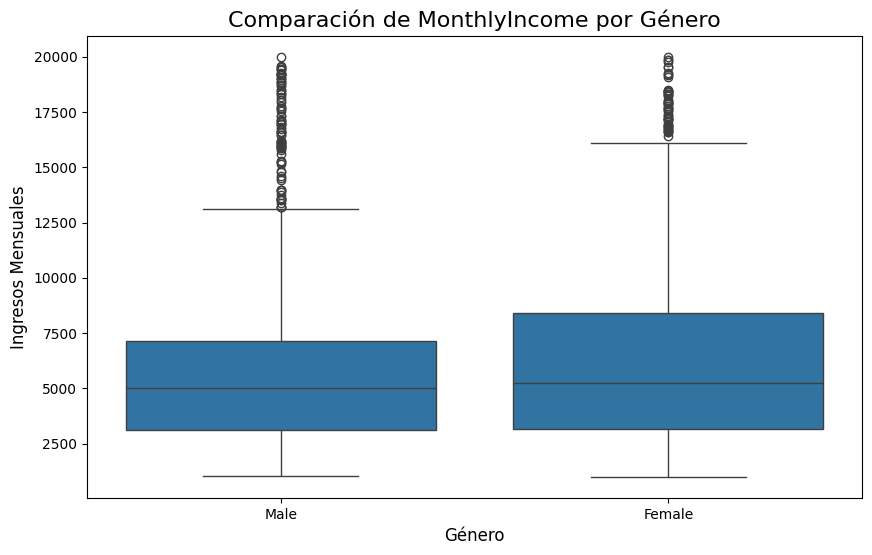

In [72]:
# Creamos un boxplot para comparar los salarios entre géneros

# Establecemos el tamaño del gráfico
plt.figure(figsize=(10, 6))

sns.boxplot(x='Gender', y='MonthlyIncome', data=df)

# Ponemos título y etiquetas a los ejes
plt.title('Comparación de MonthlyIncome por Género', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Ingresos Mensuales', fontsize=12)

# Mostramos el gráfico
plt.show();


Se ve que el primer cuartil y la mediana más o menos coinciden. En las mujeres el tercer cuartil es mayor que en el grupo de los hombres lo que siginifica que hay mayor concentración de salarios en ese tramo y, por lo tanto, la concentración de outliers para hombres será mayor sugiriendo esto una brecha salarial en el cuarto cuartil.

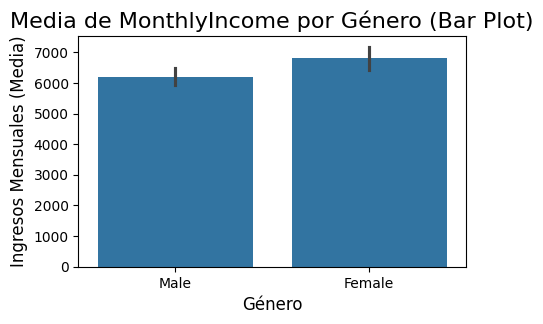

In [73]:
# Creamos un diagrama de barras que muestre la media de los salarios por género

# Establecer el tamaño del gráfico
plt.figure(figsize=(5, 3))

sns.barplot(x='Gender', y='MonthlyIncome', data=df, estimator='mean')

# Agregar título y etiquetas a los ejes
plt.title('Media de MonthlyIncome por Género (Bar Plot)', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Ingresos Mensuales (Media)', fontsize=12)

# Mostrar el gráfico
plt.show()


En promedio las mujeres cobran más que los hombres

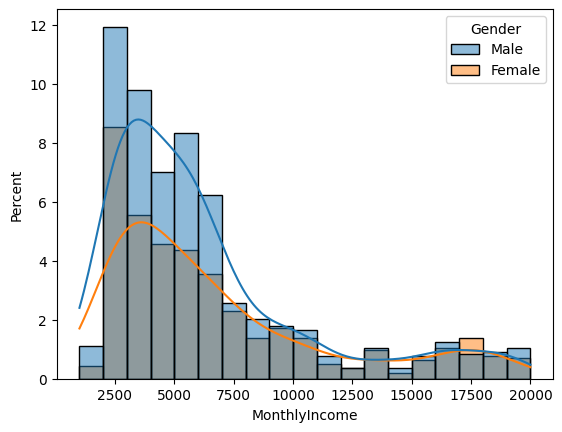

In [74]:
# Dibujamos un histograma de salarios diferenciando los porcentajes de hombres y mujeres

sns.histplot(data=df, x="MonthlyIncome", bins= 19, kde= True, stat="percent", hue="Gender");

# Vemos diferencias salarias notables entre hombres y mujeres. Las mujeres solo ganan más que los hombres en 
# los tramos (7000, 8000), (13000 14000), (15000, 16000) y (18000, 19000)

Este gráfico no nos sirve para ver las diferencias salariales entre hombres y mujeres puesto que cada barra representa el porcentaje de hombres o mujeres en relación al total de trabajadores, no en relación al total de hombres y mujeres, respectivamente, en la empresa. Hay más hombres en la mayoría de tramos salariales pero porque hay más hombres en toda la empresa

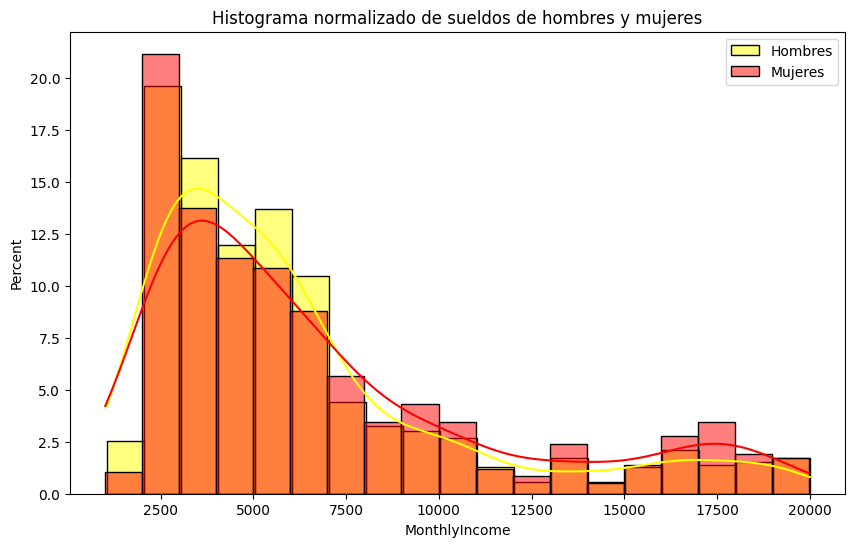

In [75]:
# Vamos a crear dos histogramas normalizados superpuestos para ver las diferencias salariales entre hombres y mujeres por tramos

# Creamos un DataFrame que tenga solo los datos de las mujeres
df_female= df[df['Gender']=='Female']
df_female.sample(3)

# Creamos un DataFrame que tenga solo los datos de los hombres
df_male= df[df['Gender']=='Male']
df_male.sample(3)

plt.figure(figsize=(10,6))

# Histograma para hombres
sns.histplot(data=df_male, x="MonthlyIncome", bins=19, kde=True, stat="percent", color='yellow', label='Hombres')

# Histograma para mujeres
sns.histplot(data=df_female, x="MonthlyIncome", bins=19, kde=True, stat="percent", color='red', label='Mujeres', alpha=0.5)

# Añadimos el título
plt.title('Histograma normalizado de sueldos de hombres y mujeres')

# Añadimos la leyenda para identificar cada grupo
plt.legend()

plt.show();

# Las áreas naranjas son áreas de superposición. Las áreas rojas muestran em qué tramos salariales hay mayor número de mujeres 
# que de hombres y las áreas amarillas donde hay más hombres que mujeres con ese salario.


A la vista de los gráficos, se puede afirmar que no existe brecha salarial entre hombres y mujeres.

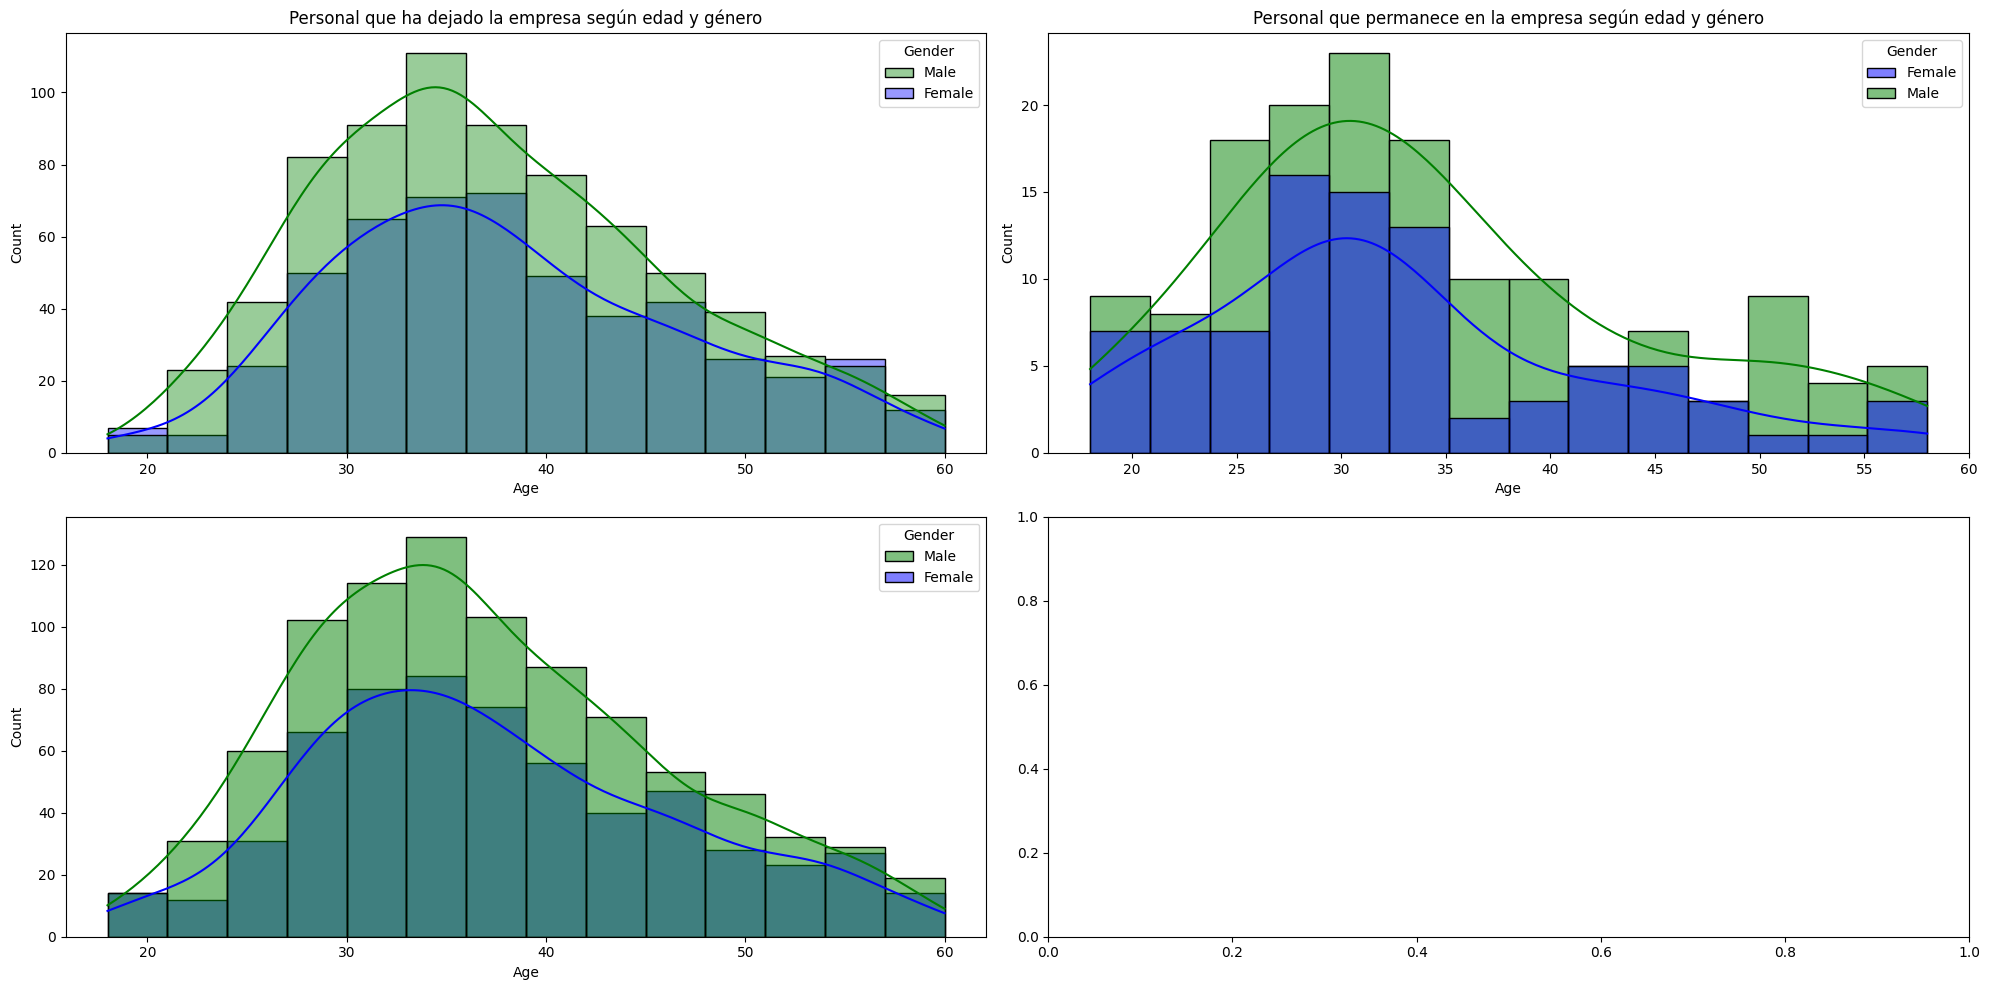

In [76]:
# Estudiamos si hay diferencias entre la edad de hombres y mujeres que dejan la empresa y se quedan

figs, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
age_attrition_no = df[df['Attrition'] == 'No']
age_attrition_yes = df[df['Attrition'] == 'Yes']
sns.histplot(data=age_attrition_no, x='Age', bins=14, kde=True, hue='Gender', ax=axes[0,0], palette=['green', 'blue'], alpha= 0.4)
sns.histplot(data=age_attrition_yes, x='Age', bins=14, kde=True, hue='Gender', palette=['blue', 'green'], ax=axes[0,1])
sns.histplot(data=df, x='Age', bins=14, kde=True, hue='Gender', ax=axes[1,0], palette=['green', 'blue'])

axes[0,0].set_title("Personal que ha dejado la empresa según edad y género")
axes[0,1].set_title("Personal que permanece en la empresa según edad y género")

plt.tight_layout();


Podemos observar en el gráfico que:
-  hombres y mujeres siguen una tendencia parecida en relación a la edad a la hora de dejar la empresa.
-  la empresa se compone de más hombres que mujeres, como ya sabíamos.
-  el rango de edad preferente para dejar la empresa es entre 30 y 40 años, que ese es el tramo de edad que concentra a más empleados.
- el comportamiento de los que se quedan es algo distinto que el de los que se van. Además, hay diferencias en el comportamiento de los hombres y mujeres que se quedan.

,Attrition,Gender,count
0,No,Male,741
1,No,Female,508
2,Yes,Male,149
3,Yes,Female,88


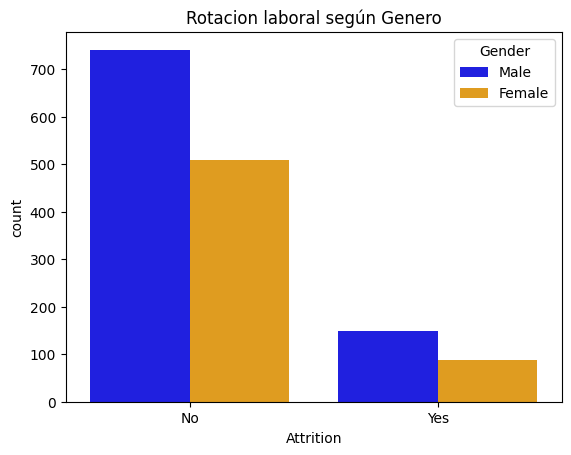

In [77]:
# Dibujamos un diagrama de barras donde se muestren las frecuencias de los empleados que se quedan y se van por géneros

# Creamos un DataFrame que nos de las frecuencias para cada uno de los 4 grupos

gender_attrition = df.groupby('Attrition')['Gender'].value_counts().reset_index()
display(gender_attrition)

sns.barplot(data=gender_attrition, x= 'Attrition', y='count', hue='Gender', palette=['blue', 'orange'])

plt.title('Rotacion laboral según Genero')

xtitle = 'Personal que ha dejado la empresa'


El gráfico no muestra de forma clara si se marchan más hombres que mujeres por ser frecuencias los valores mostrados

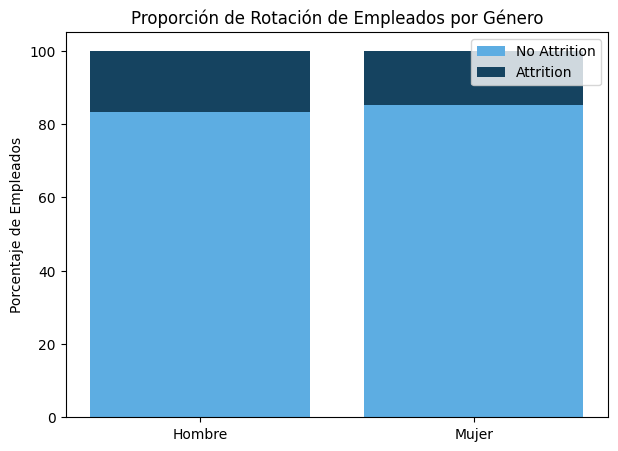

In [78]:
# Creamos un gráfico de barras apiladas con las proporciones de hombres y mujeres que se van y que se quedan para poder
# compararlos

# Calculamos las proporciones dentro de cada género
male_total = gender_attrition[gender_attrition['Gender'] == 'Male']['count'].sum()
female_total = gender_attrition[gender_attrition['Gender'] == 'Female']['count'].sum()

# Calculamos los porcentajes de rotación para cada género
no_attrition_percent = [
    gender_attrition[(gender_attrition['Gender'] == 'Male') & (gender_attrition['Attrition'] == 'No')]['count'].values[0] / male_total * 100,
    gender_attrition[(gender_attrition['Gender'] == 'Female') & (gender_attrition['Attrition'] == 'No')]['count'].values[0] / female_total * 100
]

yes_attrition_percent = [
    gender_attrition[(gender_attrition['Gender'] == 'Male') & (gender_attrition['Attrition'] == 'Yes')]['count'].values[0] / male_total * 100,
    gender_attrition[(gender_attrition['Gender'] == 'Female') & (gender_attrition['Attrition'] == 'Yes')]['count'].values[0] / female_total * 100
]

labels = ['Hombre', 'Mujer']

fig, ax = plt.subplots(figsize=(7, 5))

ax.bar(labels, no_attrition_percent, label='No Attrition', color='#5DADE2')
ax.bar(labels, yes_attrition_percent, bottom=no_attrition_percent, label='Attrition', color='#154360')

# Añadimos etiquetas y títulos
ax.set_ylabel('Porcentaje de Empleados')
ax.set_title('Proporción de Rotación de Empleados por Género')
ax.legend()

# Mostramos el gráfico
plt.show();


No hay apenas diferencias entre hombres y mujeres a la hora de marcharse de la empresa

# Análisis por puestos de trabajo

C:\Users\Alejandra\AppData\Local\Temp\ipykernel_18728\1529646393.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)  # Rotar etiquetas a 90º
C:\Users\Alejandra\AppData\Local\Temp\ipykernel_18728\1529646393.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)  # Rotar etiquetas a 90º


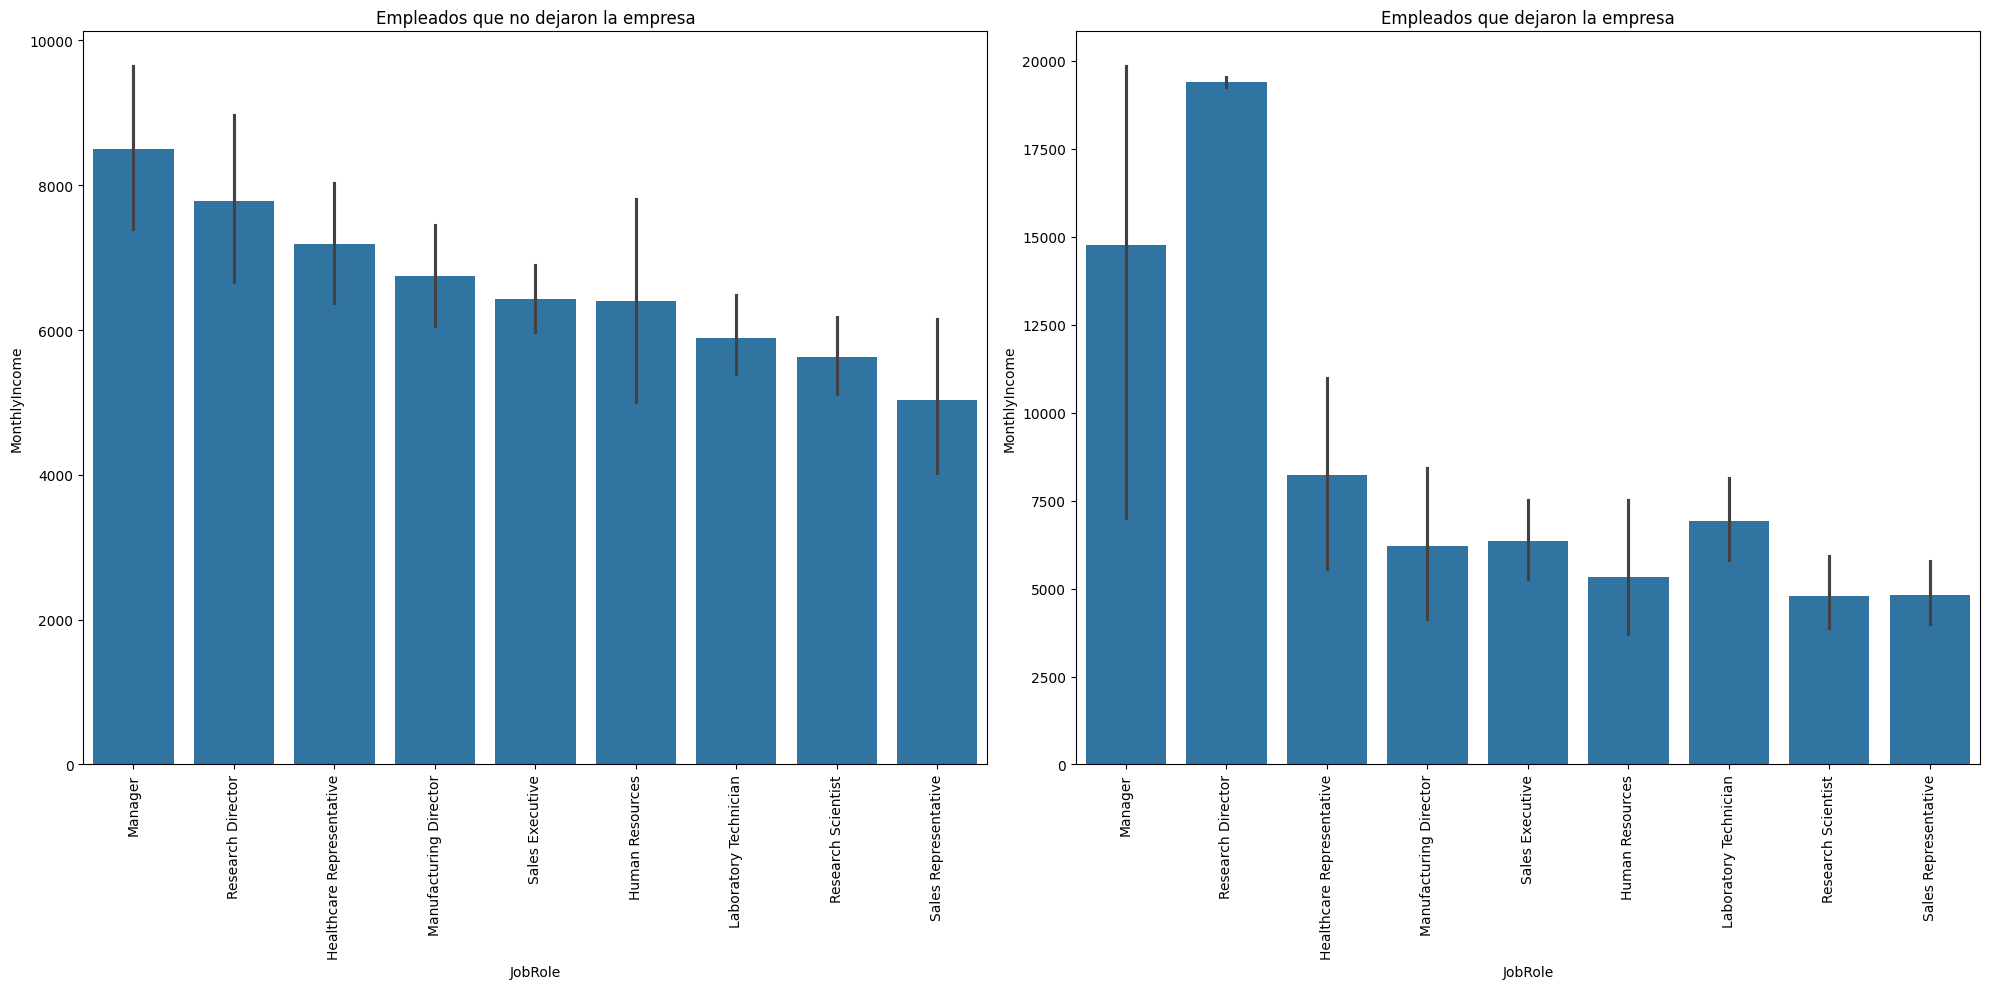

In [79]:
# Vamos a explorar si existen diferencias en ingresos entre los empleados que se marchan y los que se quedan en relación al 
# puesto de trabajo que ocupan.

# Hacemos un DataFrame para los datos de los empleados que permanecen en la empresa y otro para los que se van

attrition_no = df[df['Attrition'] == 'No']
attrition_yes = df[df['Attrition'] == 'Yes']

# Creamos una lista con los Jorole
jobrole_order = [ 'Manager',  'Research Director', 'Healthcare Representative','Manufacturing Director', 'Sales Executive',
                 'Human Resources', 'Laboratory Technician', 'Research Scientist', 'Sales Representative']

figs, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

# Gráfico para empleados que no han dejado la empresa
sns.barplot(x='JobRole', y='MonthlyIncome', data=attrition_no, ax=axes[0], order=jobrole_order)
axes[0].set_title('Empleados que no dejaron la empresa')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)  # Rotar etiquetas a 90º

# Gráfico para empleados que dejaron la empresa
sns.barplot(x='JobRole', y='MonthlyIncome', data=attrition_yes, ax=axes[1], order=jobrole_order)
axes[1].set_title('Empleados que dejaron la empresa')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)  # Rotar etiquetas a 90º

plt.tight_layout()
plt.show();


Estos dos gráficos no tienen la misma escala en el eje de ordenadas. Por lo tanto, resultan totalmente engañosos.

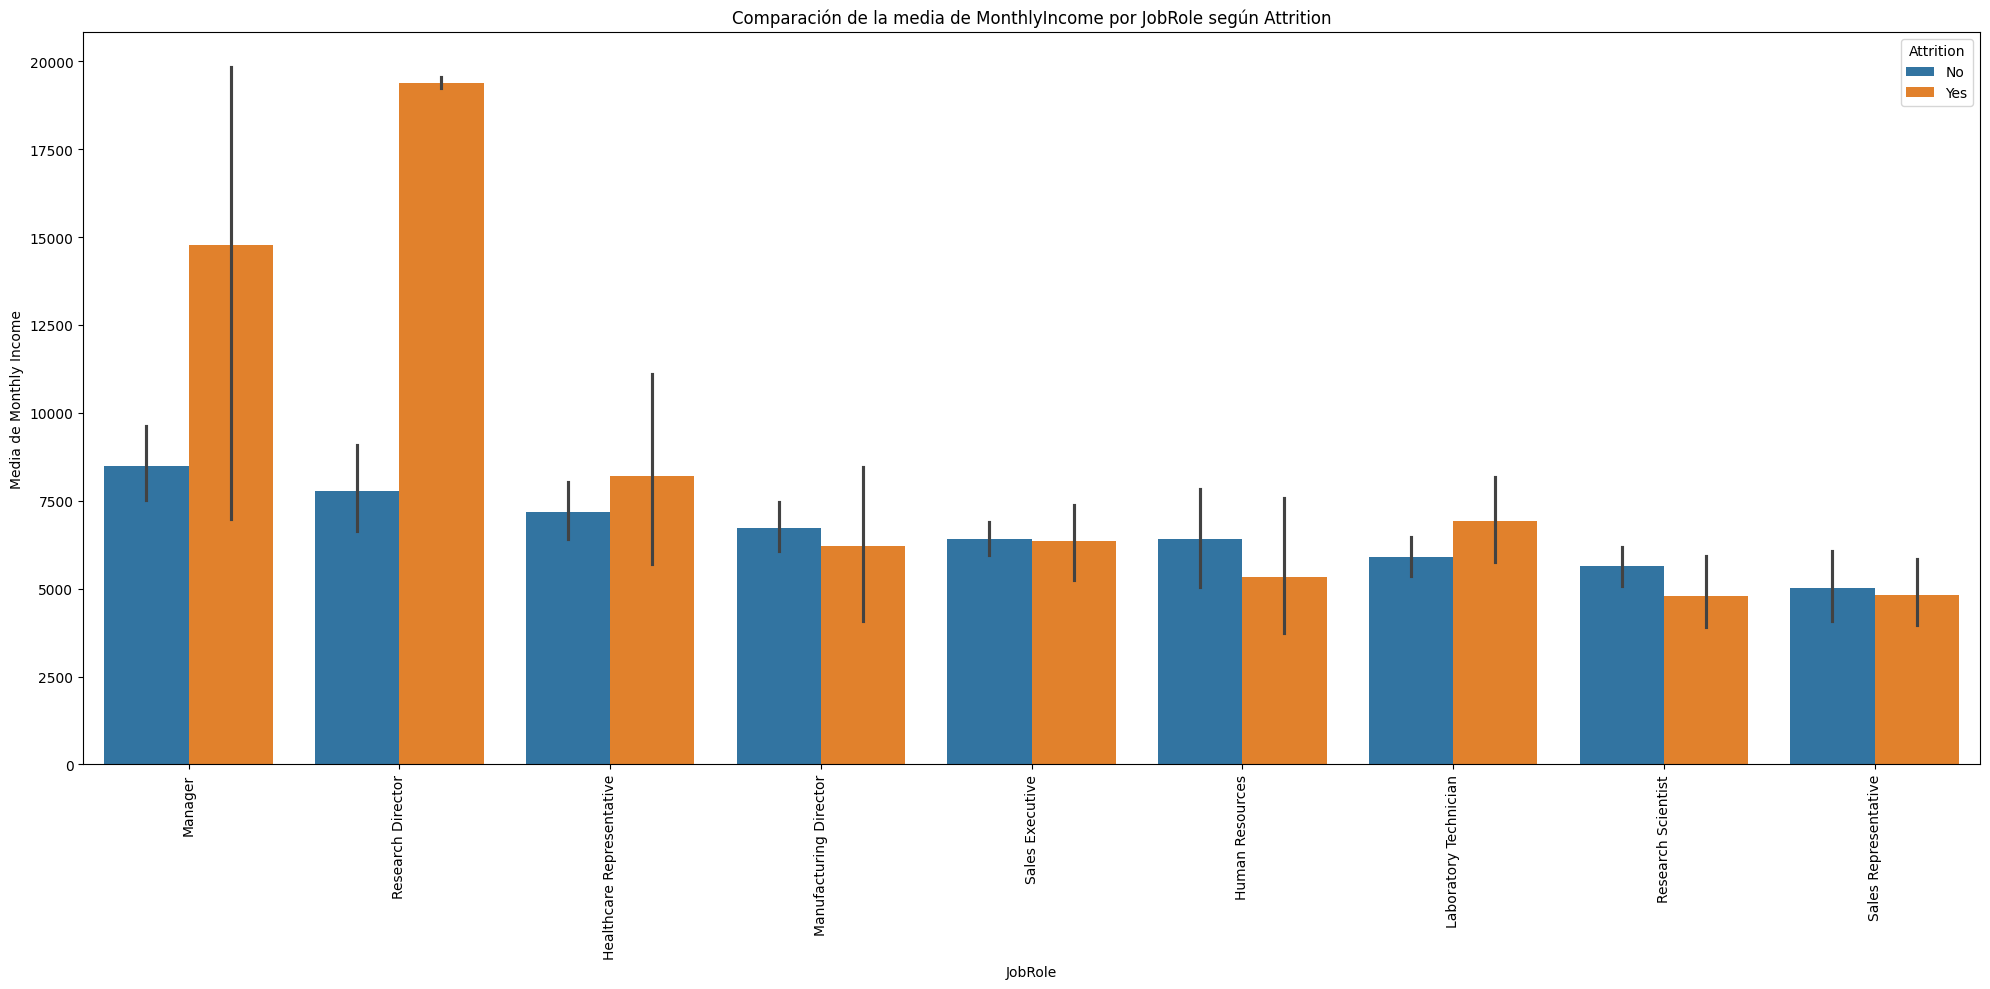

In [80]:
# Vamos a superponer ambos gráficos en uno solo para poder compararlos

plt.figure(figsize=(20, 10))
sns.barplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=df, order=jobrole_order)

# Rotamos las etiquetas del eje x a 90º
plt.xticks(rotation=90)

plt.ylabel ('Media de Monthly Income')

# Ponemos título al gráfico
plt.title('Comparación de la media de MonthlyIncome por JobRole según Attrition')

# Ajustamos el gráfico para evitar solapamientos
plt.tight_layout()

# Mostramos el gráfico
plt.show();




Esta gráfica muestra la media de salarios para cada JobRole para el grupo de los que se queda y para el grupo de los que se
van. Las barras verticales muestran la variación de la media dentro del grupo.

Hay dos grupos en que la diferencia de la media de ingresos mensuales de los que se quedan y los que se van es notable: 
Manager y ResearchDirector. Parece que los que se van de estos 2 cobran muho más que los que se quedan. La variabilidad 
de salarios en el grupo de los Manager que se marchan es muy elevada.

# Análisis de variables que reflejan la satisfacción del trabajador

WorkLifeBalance

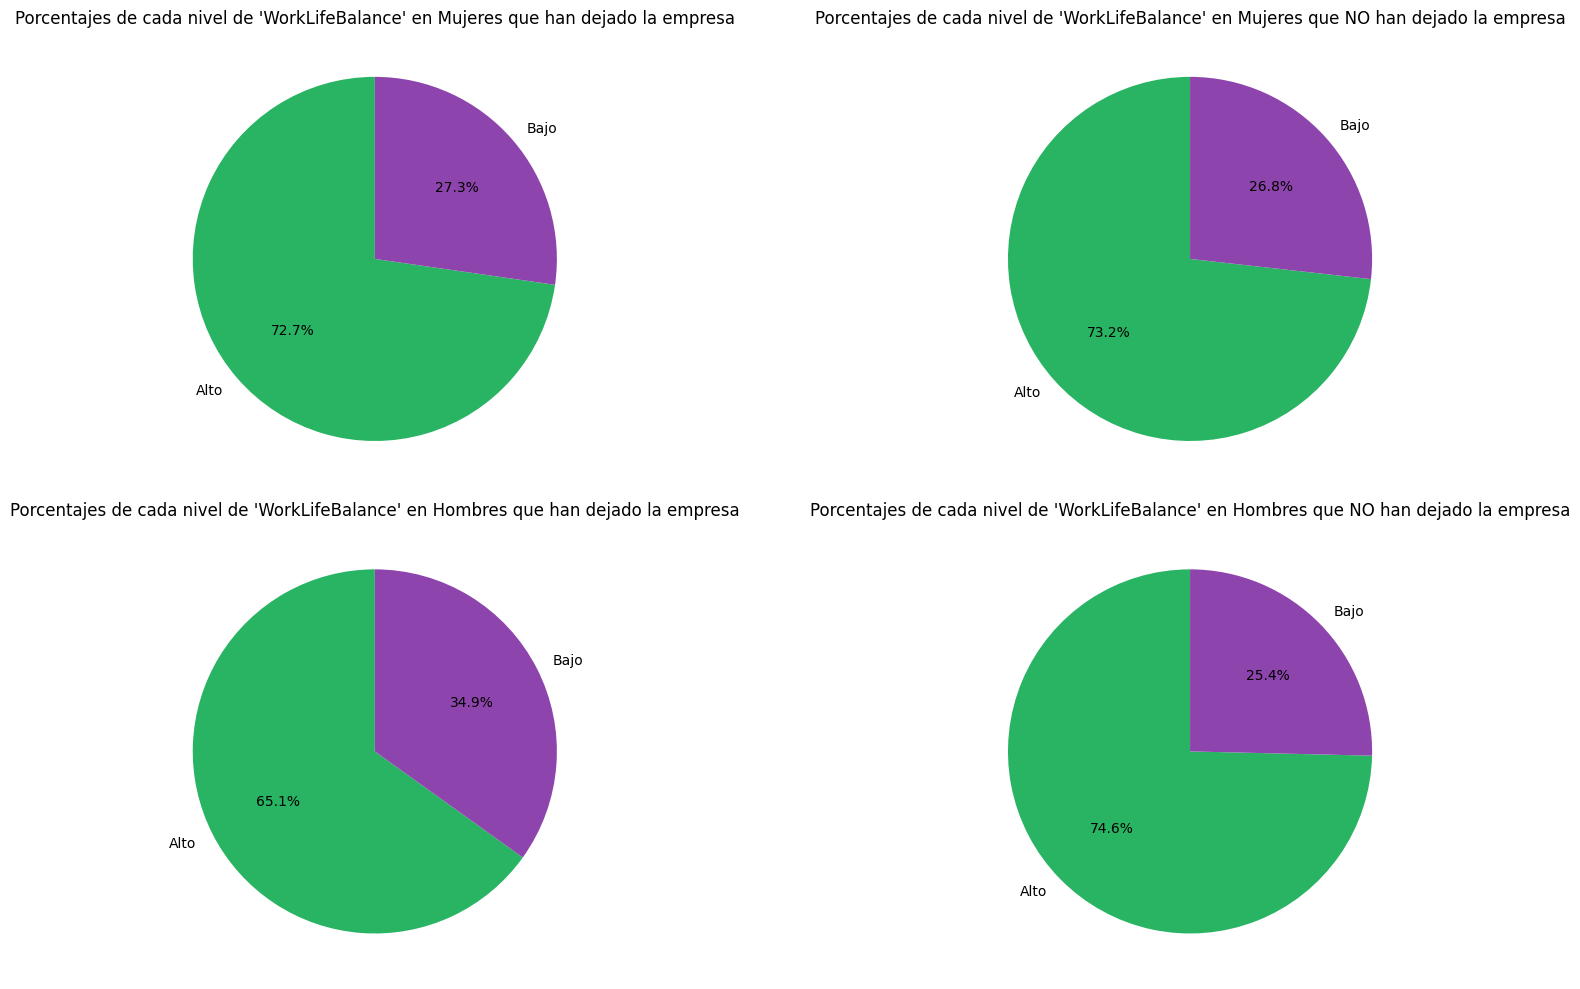

In [81]:
# Creamos una nueva columna para categorizar 'WorkLifeBalance'
df['WorkLifeBalanceCat'] = df['WorkLifeBalance'].apply(lambda x: 'Alto' if x in [3, 4] else 'Bajo')

# Filtramos los datos por género y attrition como antes
wlb_fem_yes = df.loc[(df['Gender'] == 'Female') & (df['Attrition'] == 'Yes'), :]
wlb_fem_no = df.loc[(df['Gender'] == 'Female') & (df['Attrition'] == 'No'), :]
wlb_male_yes = df.loc[(df['Gender'] == 'Male') & (df['Attrition'] == 'Yes'), :]
wlb_male_no = df.loc[(df['Gender'] == 'Male') & (df['Attrition'] == 'No'), :]

# Agrupamos los datos por la nueva columna 'WorkLifeBalanceCat'
df_wlb_fem_yes = wlb_fem_yes.groupby('WorkLifeBalanceCat')['Gender'].count().reset_index()
df_wlb_fem_no = wlb_fem_no.groupby('WorkLifeBalanceCat')['Gender'].count().reset_index()
df_wlb_male_yes = wlb_male_yes.groupby('WorkLifeBalanceCat')['Gender'].count().reset_index()
df_wlb_male_no = wlb_male_no.groupby('WorkLifeBalanceCat')['Gender'].count().reset_index()

# Elegimos los colores 
colores = ["#28B463", "#8E44AD"]

# Creamos las subplots
figs, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# Gráficos de pie para cada grupo
axes[0, 0].pie(df_wlb_fem_yes['Gender'], labels=df_wlb_fem_yes['WorkLifeBalanceCat'], autopct="%1.1f%%", startangle=90, colors= colores)
axes[0, 1].pie(df_wlb_fem_no['Gender'], labels=df_wlb_fem_no['WorkLifeBalanceCat'], autopct="%1.1f%%", startangle=90, colors= colores)
axes[1, 0].pie(df_wlb_male_yes['Gender'], labels=df_wlb_male_yes['WorkLifeBalanceCat'], autopct="%1.1f%%", startangle=90, colors= colores)
axes[1, 1].pie(df_wlb_male_no['Gender'], labels=df_wlb_male_no['WorkLifeBalanceCat'], autopct="%1.1f%%", startangle=90, colors= colores)

# Títulos para cada gráfico
axes[0, 0].set_title("Porcentajes de cada nivel de 'WorkLifeBalance' en Mujeres que han dejado la empresa")
axes[0, 1].set_title("Porcentajes de cada nivel de 'WorkLifeBalance' en Mujeres que NO han dejado la empresa")
axes[1, 0].set_title("Porcentajes de cada nivel de 'WorkLifeBalance' en Hombres que han dejado la empresa")
axes[1, 1].set_title("Porcentajes de cada nivel de 'WorkLifeBalance' en Hombres que NO han dejado la empresa")

# Mostrar gráfico
plt.tight_layout()
plt.show()


No hay diferencias sustanciales entre el porcentaje de mujeres que deja la empresa y las que se queda en relación al equilibrio entre vida personal y profesional. Sin embargo, sí hay una diferencia relevante en los hombres: los que se marchan están un 10% menos satisfechos que los que se quedan en relación a este índice

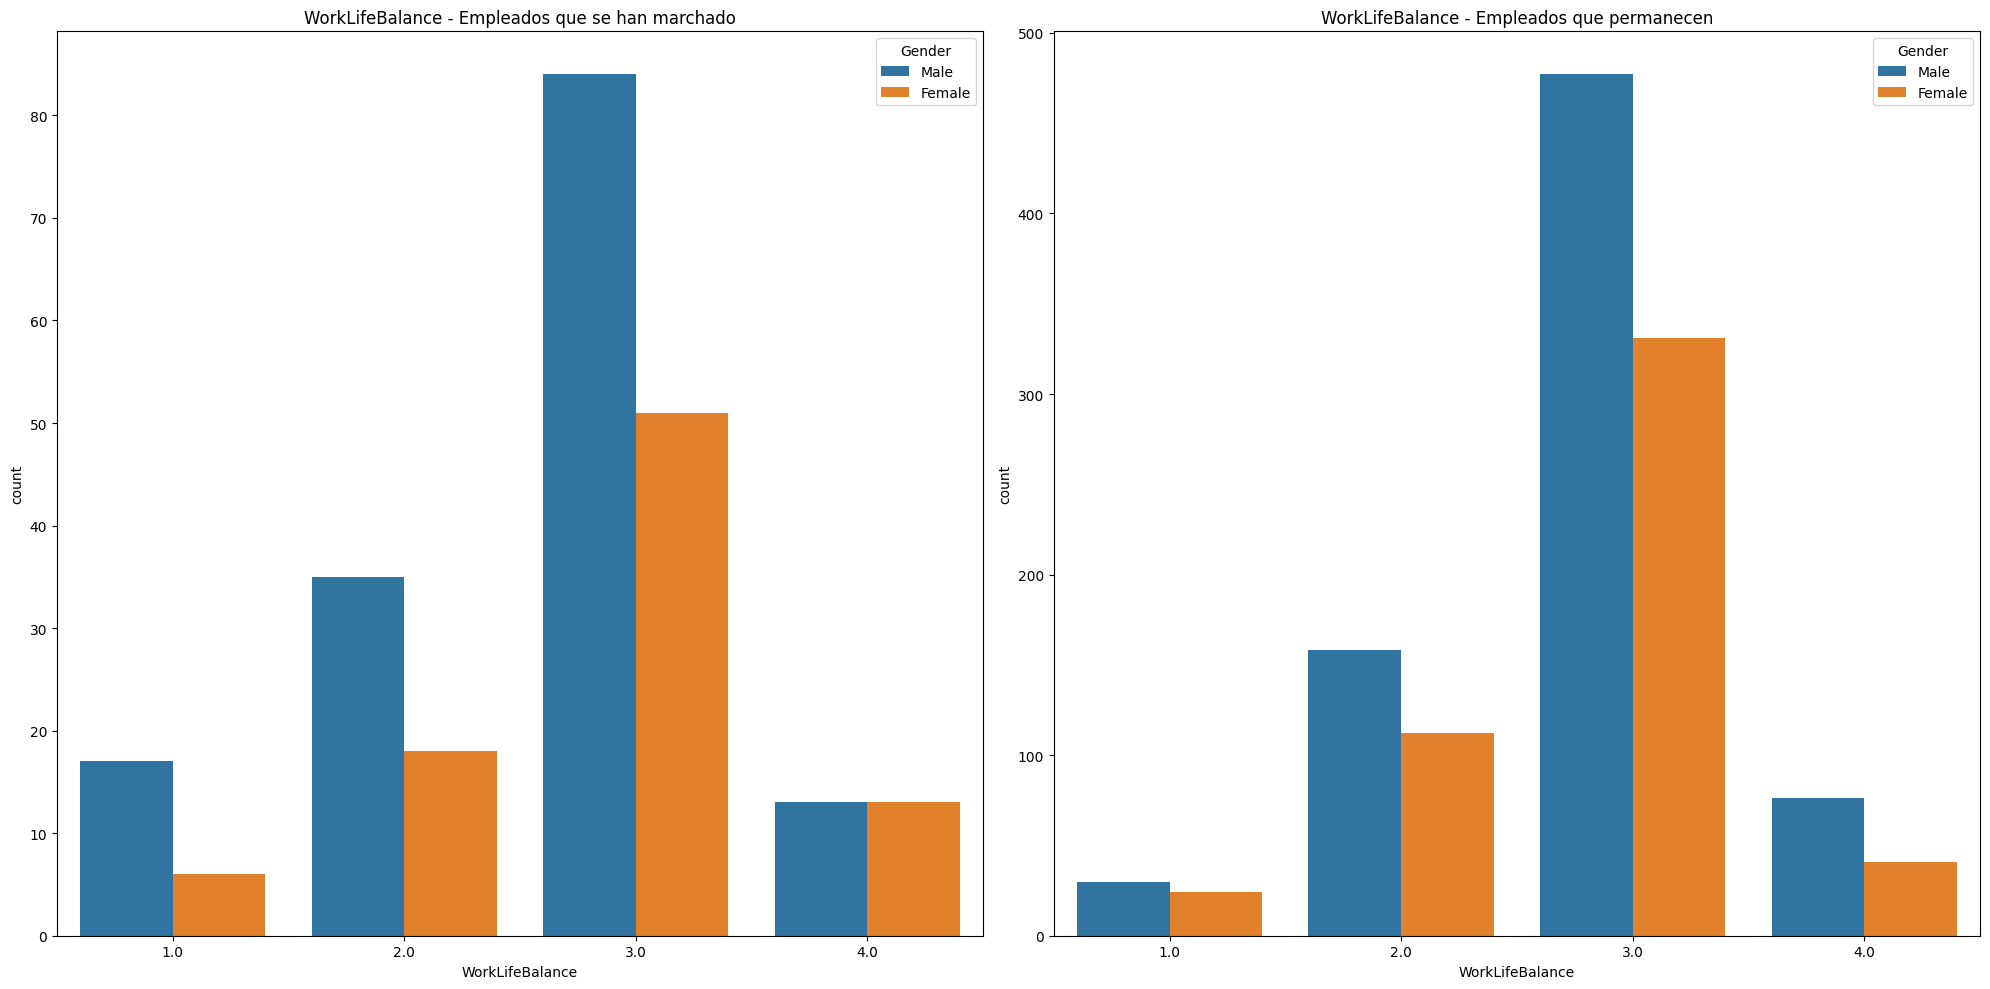

In [82]:
# Probamos a representar lo mismo con un diagrama de barras

figs, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

wlb_attrition_no = attrition_no.groupby('WorkLifeBalance')['Gender'].value_counts().reset_index()
wlb_attrition_yes = attrition_yes.groupby('WorkLifeBalance')['Gender'].value_counts().reset_index()

sns.barplot(data=wlb_attrition_yes, x= 'WorkLifeBalance', y='count', hue='Gender', ax =axes [0])
sns.barplot(data=wlb_attrition_no, x= 'WorkLifeBalance', y='count', hue='Gender', ax = axes [1])

axes[0].set_title('WorkLifeBalance - Empleados que se han marchado')
axes[1].set_title('WorkLifeBalance - Empleados que permanecen')

plt.tight_layout()
plt.show()


Al desagregar datos se obtiene mas información de cada grupo pero el pie chart refleja mejor lo que queremos mostrar

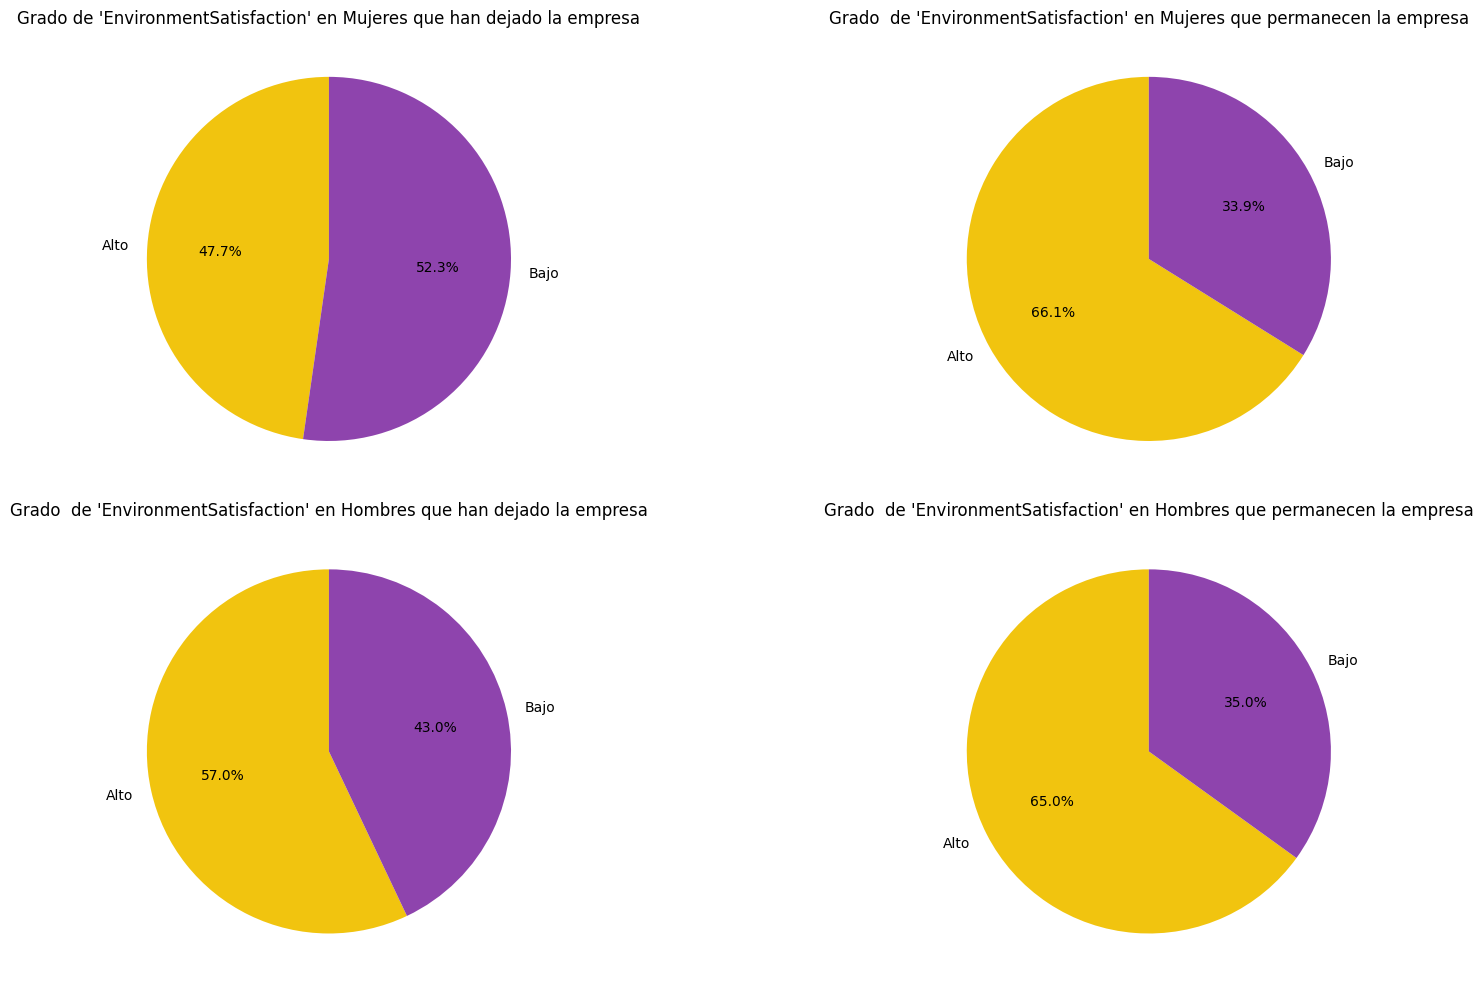

In [83]:
# Diagrama de pastel para la satisfacción con el entorno de trabajo

# Creamos una nueva columna para categorizar 'EnvironmentSatisfaction'
df['EnvSatisfactionCat'] = df['EnvironmentSatisfaction'].apply(lambda x: 'Alto' if x in [3, 4] else 'Bajo')

colores = ("#F1C40F", "#8E44AD")

# Filtramos los datos por género y attrition como antes
wlb_fem_yes = df.loc[(df['Gender'] == 'Female') & (df['Attrition'] == 'Yes'), :]
wlb_fem_no = df.loc[(df['Gender'] == 'Female') & (df['Attrition'] == 'No'), :]
wlb_male_yes = df.loc[(df['Gender'] == 'Male') & (df['Attrition'] == 'Yes'), :]
wlb_male_no = df.loc[(df['Gender'] == 'Male') & (df['Attrition'] == 'No'), :]

# Agrupamos los datos por la nueva columna 'WorkLifeBalanceCat'
df_wlb_fem_yes = wlb_fem_yes.groupby('EnvSatisfactionCat')['Gender'].count().reset_index()
df_wlb_fem_no = wlb_fem_no.groupby('EnvSatisfactionCat')['Gender'].count().reset_index()
df_wlb_male_yes = wlb_male_yes.groupby('EnvSatisfactionCat')['Gender'].count().reset_index()
df_wlb_male_no = wlb_male_no.groupby('EnvSatisfactionCat')['Gender'].count().reset_index()

# Creamos las subplots
figs, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# Gráficos de pie para cada grupo
axes[0, 0].pie(df_wlb_fem_yes['Gender'], labels=df_wlb_fem_yes['EnvSatisfactionCat'], autopct="%1.1f%%", startangle=90, colors= colores)
axes[0, 1].pie(df_wlb_fem_no['Gender'], labels=df_wlb_fem_no['EnvSatisfactionCat'], autopct="%1.1f%%", startangle=90, colors= colores)
axes[1, 0].pie(df_wlb_male_yes['Gender'], labels=df_wlb_male_yes['EnvSatisfactionCat'], autopct="%1.1f%%", startangle=90, colors= colores)
axes[1, 1].pie(df_wlb_male_no['Gender'], labels=df_wlb_male_no['EnvSatisfactionCat'], autopct="%1.1f%%", startangle=90, colors= colores)

# Títulos para cada gráfico
axes[0, 0].set_title("Grado de 'EnvironmentSatisfaction' en Mujeres que han dejado la empresa")
axes[0, 1].set_title("Grado  de 'EnvironmentSatisfaction' en Mujeres que permanecen la empresa")
axes[1, 0].set_title("Grado  de 'EnvironmentSatisfaction' en Hombres que han dejado la empresa")
axes[1, 1].set_title("Grado  de 'EnvironmentSatisfaction' en Hombres que permanecen la empresa")

# Mostrar gráfico
plt.tight_layout()
plt.show()


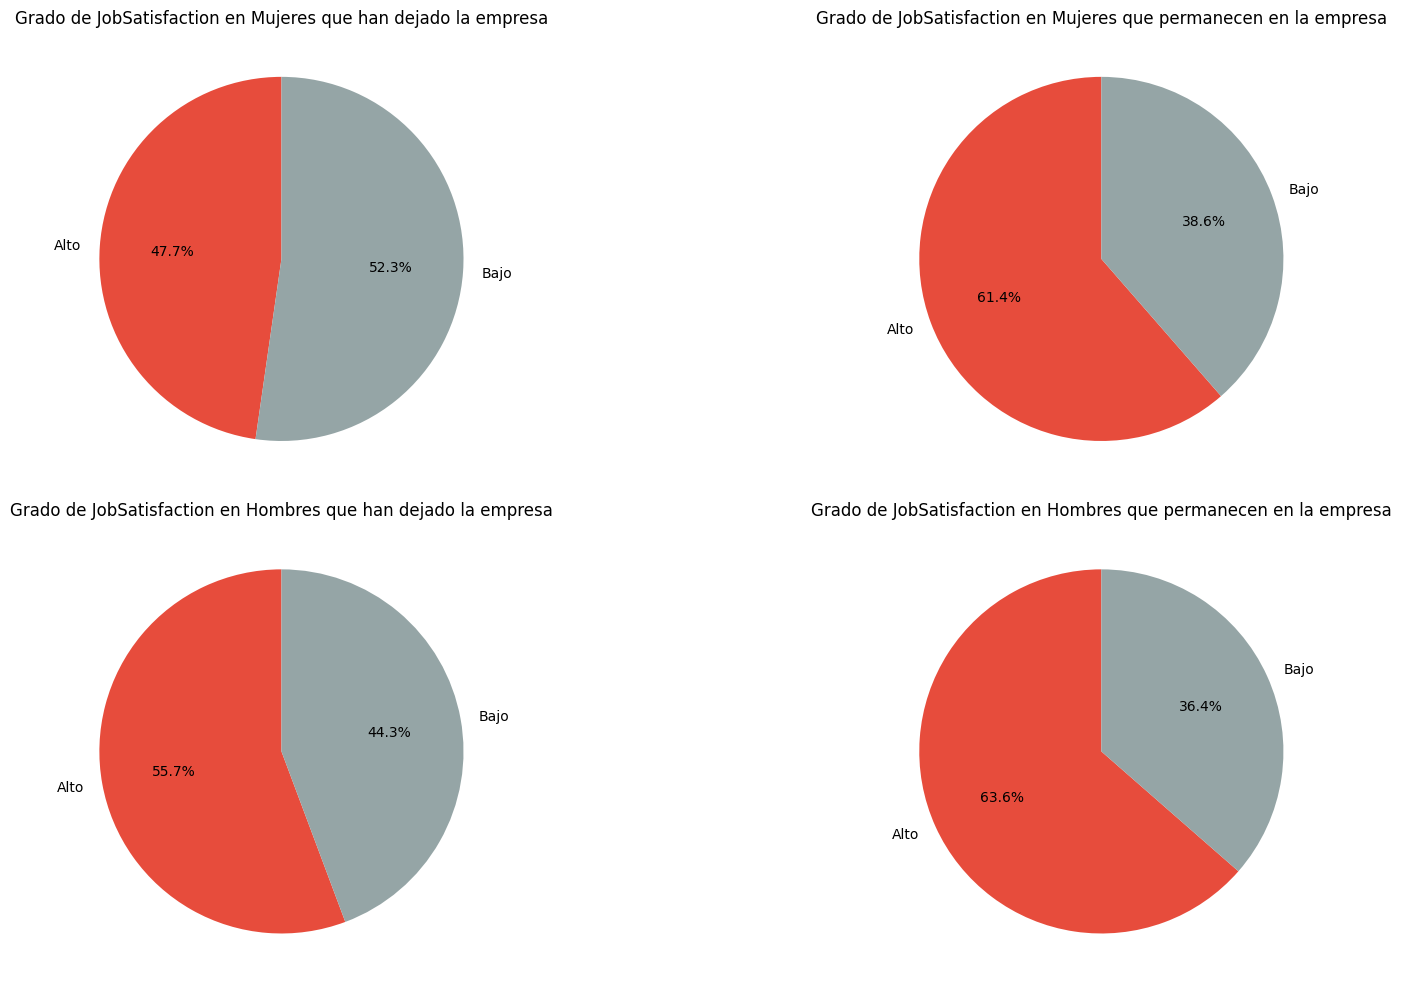

In [84]:
# Diagrama de pastel para la satisfacción con el trabajo

df['Satisfaction'] = df['JobSatisfaction'].apply(lambda x:'Alto' if x > 2 else 'Bajo')
figs, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
wlb_fem_yes = df.loc[(df['Gender'] == 'Female')&(df['Attrition'] == 'Yes'),:]
wlb_fem_no = df.loc[(df['Gender'] == 'Female')&(df['Attrition'] == 'No'),:]
wlb_male_yes = df.loc[(df['Gender'] == 'Male')&(df['Attrition'] == 'Yes'),:]
wlb_male_no = df.loc[(df['Gender'] == 'Male')&(df['Attrition'] == 'No'),:]

df_wlb_fem_yes = wlb_fem_yes.groupby('Satisfaction')['Gender'].count().reset_index()
df_wlb_fem_no = wlb_fem_no.groupby('Satisfaction')['Gender'].count().reset_index()
df_wlb_male_yes = wlb_male_yes.groupby('Satisfaction')['Gender'].count().reset_index()
df_wlb_male_no = wlb_male_no.groupby('Satisfaction')['Gender'].count().reset_index()

colores = ["#E74C3C", "#95A5A6"]

axes[0,0].pie("Gender", labels= "Satisfaction", data=df_wlb_fem_yes, autopct="%1.1f%%", startangle=90, rotatelabels=0, colors=colores);
axes[0,1].pie("Gender", labels= "Satisfaction", data=df_wlb_fem_no, autopct="%1.1f%%", startangle=90, rotatelabels=0, colors=colores);
axes[1,0].pie("Gender", labels= "Satisfaction", data=df_wlb_male_yes, autopct="%1.1f%%", startangle=90, rotatelabels=0, colors=colores);
axes[1,1].pie("Gender", labels= "Satisfaction", data=df_wlb_male_no, autopct="%1.1f%%", startangle=90, rotatelabels=0, colors=colores);

axes[0,0].set_title("Grado de JobSatisfaction en Mujeres que han dejado la empresa")
axes[0,1].set_title("Grado de JobSatisfaction en Mujeres que permanecen en la empresa")
axes[1,0].set_title("Grado de JobSatisfaction en Hombres que han dejado la empresa")
axes[1,1].set_title("Grado de JobSatisfaction en Hombres que permanecen en la empresa")

plt.tight_layout();


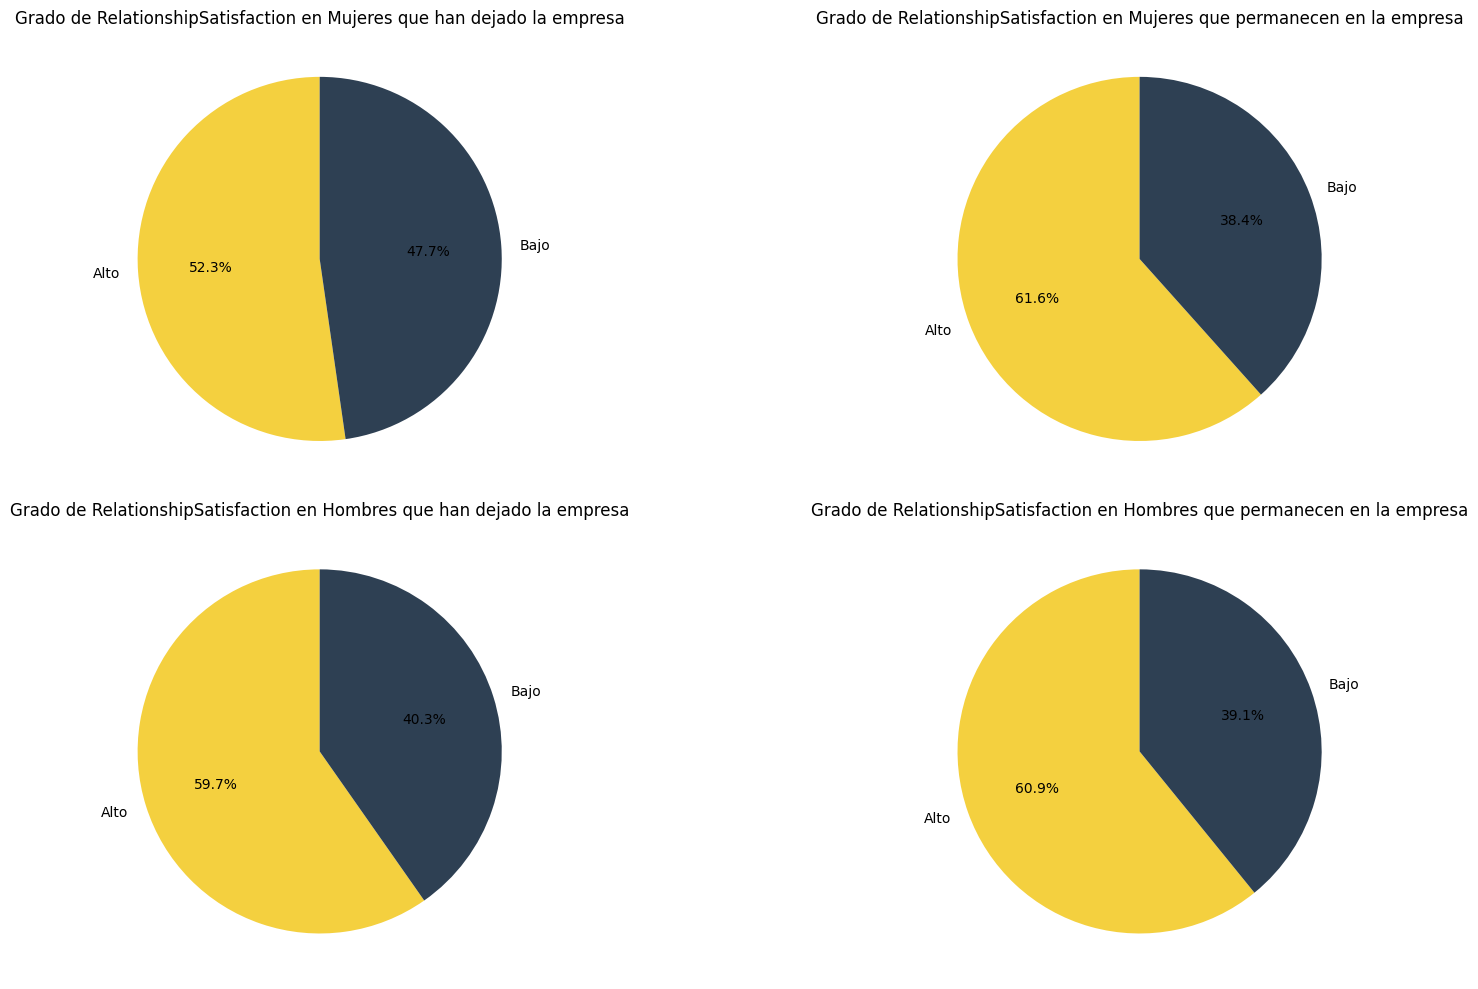

In [85]:
# Diagrama de pastel para la satisfacción con las relaciones interpersonales

df['Satisfaction_RS'] = df['RelationshipSatisfaction'].apply(lambda x:'Alto' if x > 2 else 'Bajo')

figs, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
wlb_fem_yes = df.loc[(df['Gender'] == 'Female')&(df['Attrition'] == 'Yes'),:]
wlb_fem_no = df.loc[(df['Gender'] == 'Female')&(df['Attrition'] == 'No'),:]
wlb_male_yes = df.loc[(df['Gender'] == 'Male')&(df['Attrition'] == 'Yes'),:]
wlb_male_no = df.loc[(df['Gender'] == 'Male')&(df['Attrition'] == 'No'),:]

df_wlb_fem_yes = wlb_fem_yes.groupby('Satisfaction_RS')['Gender'].count().reset_index()
df_wlb_fem_no = wlb_fem_no.groupby('Satisfaction_RS')['Gender'].count().reset_index()
df_wlb_male_yes = wlb_male_yes.groupby('Satisfaction_RS')['Gender'].count().reset_index()
df_wlb_male_no = wlb_male_no.groupby('Satisfaction_RS')['Gender'].count().reset_index()

colores = ["#F4D03F", "#2E4053"]

axes[0,0].pie("Gender", labels= "Satisfaction_RS", data=df_wlb_fem_yes, autopct="%1.1f%%", startangle=90, rotatelabels=0, colors=colores);
axes[0,1].pie("Gender", labels= "Satisfaction_RS", data=df_wlb_fem_no, autopct="%1.1f%%", startangle=90, rotatelabels=0, colors=colores);
axes[1,0].pie("Gender", labels= "Satisfaction_RS", data=df_wlb_male_yes, autopct="%1.1f%%", startangle=90, rotatelabels=0, colors=colores);
axes[1,1].pie("Gender", labels= "Satisfaction_RS", data=df_wlb_male_no, autopct="%1.1f%%", startangle=90, rotatelabels=0, colors=colores);

axes[0,0].set_title("Grado de RelationshipSatisfaction en Mujeres que han dejado la empresa")
axes[0,1].set_title("Grado de RelationshipSatisfaction en Mujeres que permanecen en la empresa")
axes[1,0].set_title("Grado de RelationshipSatisfaction en Hombres que han dejado la empresa")
axes[1,1].set_title("Grado de RelationshipSatisfaction en Hombres que permanecen en la empresa")

plt.tight_layout();


In [86]:
df.head()

,EmployeeNumber,Age,Gender,Education,EducationField,NumCompaniesWorked,JobLevel,JobRole,Department,JobInvolvement,PerformanceRating,Attrition,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,MonthlyIncome,StockOptionLevel,PercentSalaryHike,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear,BusinessTravel,DistanceFromHome,OverTime,RemoteWork,mean_satisfaction,WorkLifeBalanceCat,EnvSatisfactionCat,Satisfaction,Satisfaction_RS
0,162.0,51,Male,3,NaN,7,5,Research Director,Unknown,3,3.0,No,3,1.0,3,3.0,19537.0,0,13,20,15,15,5,Non-Travel,6,No,Yes,2.333333,Alto,Bajo,Alto,Alto
1,259.0,52,Male,4,Life Sciences,0,5,Manager,Unknown,2,3.0,No,3,3.0,1,3.0,19999.0,1,14,33,11,9,5,Non-Travel,1,No,Yes,2.333333,Alto,Alto,Alto,Bajo
2,319.0,42,Male,2,Technical Degree,1,5,Manager,Research & Development,3,3.0,No,4,3.0,4,3.0,19232.0,0,11,22,11,15,3,travel_rarely,4,No,Yes,3.666667,Alto,Alto,Alto,Alto
3,Unknown,47,Female,4,Medical,3,4,Research Director,Unknown,3,3.0,No,3,1.0,2,3.0,17169.0,2,19,20,5,6,2,travel_rarely,2,No,No,2.000000,Alto,Bajo,Alto,Bajo
4,Unknown,46,Female,3,Technical Degree,2,4,Sales Executive,Unknown,4,3.0,No,1,1.0,4,3.0,12528.4,1,12,19,2,8,5,Non-Travel,3,No,No,2.000000,Alto,Bajo,Bajo,Alto


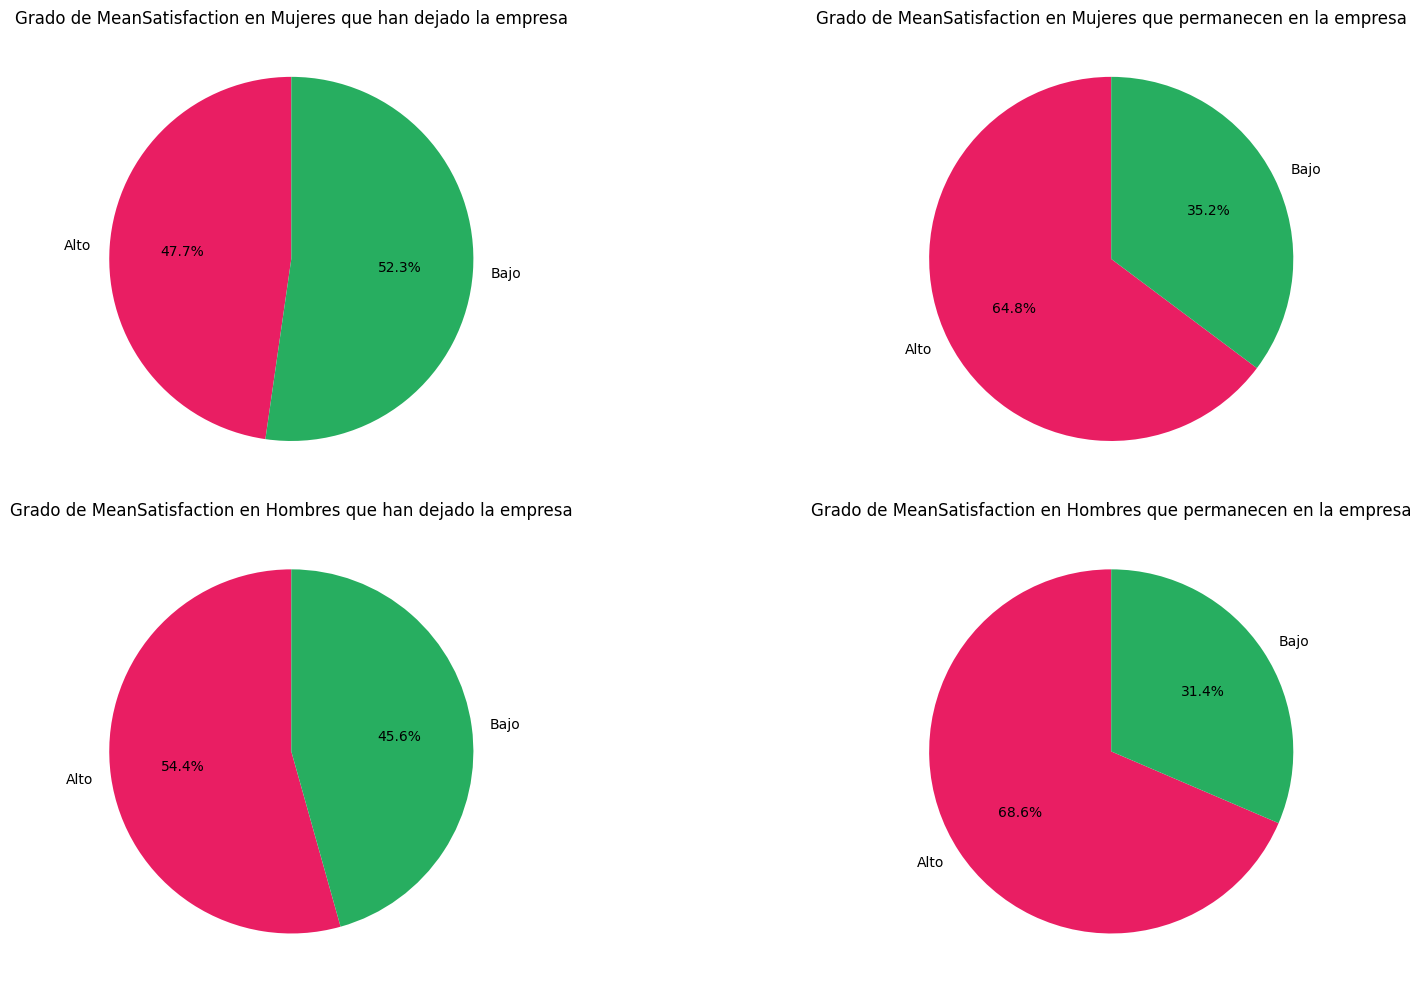

In [87]:
# Diagramas de pastel para la satisfacción media

df['MeanSatisfaction_A_B'] = df['mean_satisfaction'].apply(lambda x:'Alto' if x >= 2.5 else 'Bajo')

figs, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
wlb_fem_yes = df.loc[(df['Gender'] == 'Female')&(df['Attrition'] == 'Yes'),:]
wlb_fem_no = df.loc[(df['Gender'] == 'Female')&(df['Attrition'] == 'No'),:]
wlb_male_yes = df.loc[(df['Gender'] == 'Male')&(df['Attrition'] == 'Yes'),:]
wlb_male_no = df.loc[(df['Gender'] == 'Male')&(df['Attrition'] == 'No'),:]

df_wlb_fem_yes = wlb_fem_yes.groupby('MeanSatisfaction_A_B')['Gender'].count().reset_index()
df_wlb_fem_no = wlb_fem_no.groupby('MeanSatisfaction_A_B')['Gender'].count().reset_index()
df_wlb_male_yes = wlb_male_yes.groupby('MeanSatisfaction_A_B')['Gender'].count().reset_index()
df_wlb_male_no = wlb_male_no.groupby('MeanSatisfaction_A_B')['Gender'].count().reset_index()

colores = ["#E91E63", "#27AE60"]

axes[0,0].pie("Gender", labels= "MeanSatisfaction_A_B", data=df_wlb_fem_yes, autopct="%1.1f%%", startangle=90, rotatelabels=0, colors=colores);
axes[0,1].pie("Gender", labels= "MeanSatisfaction_A_B", data=df_wlb_fem_no, autopct="%1.1f%%", startangle=90, rotatelabels=0, colors=colores);
axes[1,0].pie("Gender", labels= "MeanSatisfaction_A_B", data=df_wlb_male_yes, autopct="%1.1f%%", startangle=90, rotatelabels=0, colors=colores);
axes[1,1].pie("Gender", labels= "MeanSatisfaction_A_B", data=df_wlb_male_no, autopct="%1.1f%%", startangle=90, rotatelabels=0, colors=colores);

axes[0,0].set_title("Grado de MeanSatisfaction en Mujeres que han dejado la empresa")
axes[0,1].set_title("Grado de MeanSatisfaction en Mujeres que permanecen en la empresa")
axes[1,0].set_title("Grado de MeanSatisfaction en Hombres que han dejado la empresa")
axes[1,1].set_title("Grado de MeanSatisfaction en Hombres que permanecen en la empresa")

plt.tight_layout();
